___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries

In [ ]:
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [ ]:
strategy = tf.distribute.TPUStrategy(resolver)

In [ ]:
!pip install scikit-plot

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import warnings
import re
from wordcloud import WordCloud
from sklearn.model_selection import cross_validate
from sklearn.metrics import RocCurveDisplay, make_scorer, f1_score, accuracy_score, roc_auc_score, average_precision_score, precision_score, recall_score, PrecisionRecallDisplay
from scikitplot.metrics import plot_roc, precision_recall_curve, plot_precision_recall

warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 50)

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Load and Discover the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/SDA/Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


In [ ]:
df.shape

(23486, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,23486.0,11742.500000,6779.968547,0.0,5871.25,11742.5,17613.75,23485.0
Clothing ID,23486.0,918.118709,203.298980,0.0,861.00,936.0,1078.00,1205.0
Age,23486.0,43.198544,12.279544,18.0,34.00,41.0,52.00,99.0
Rating,23486.0,4.196032,1.110031,1.0,4.00,5.0,5.00,5.0
Recommended IND,23486.0,0.822362,0.382216,0.0,1.00,1.0,1.00,1.0
Positive Feedback Count,23486.0,2.535936,5.702202,0.0,0.00,1.0,3.00,122.0


In [ ]:
df.isnull().any()

Unnamed: 0                 False
Clothing ID                False
Age                        False
Title                       True
Review Text                 True
Rating                     False
Recommended IND            False
Positive Feedback Count    False
Division Name               True
Department Name             True
Class Name                  True
dtype: bool

In [ ]:
df.duplicated().sum()
# There is not any duplicated records

0

In [ ]:
for col in df.columns:
    print(f"{col:<25}: {df[col].nunique():<10}unique values")

Unnamed: 0               : 23486     unique values
Clothing ID              : 1206      unique values
Age                      : 77        unique values
Title                    : 13993     unique values
Review Text              : 22634     unique values
Rating                   : 5         unique values
Recommended IND          : 2         unique values
Positive Feedback Count  : 82        unique values
Division Name            : 3         unique values
Department Name          : 6         unique values
Class Name               : 20        unique values


<Axes: >

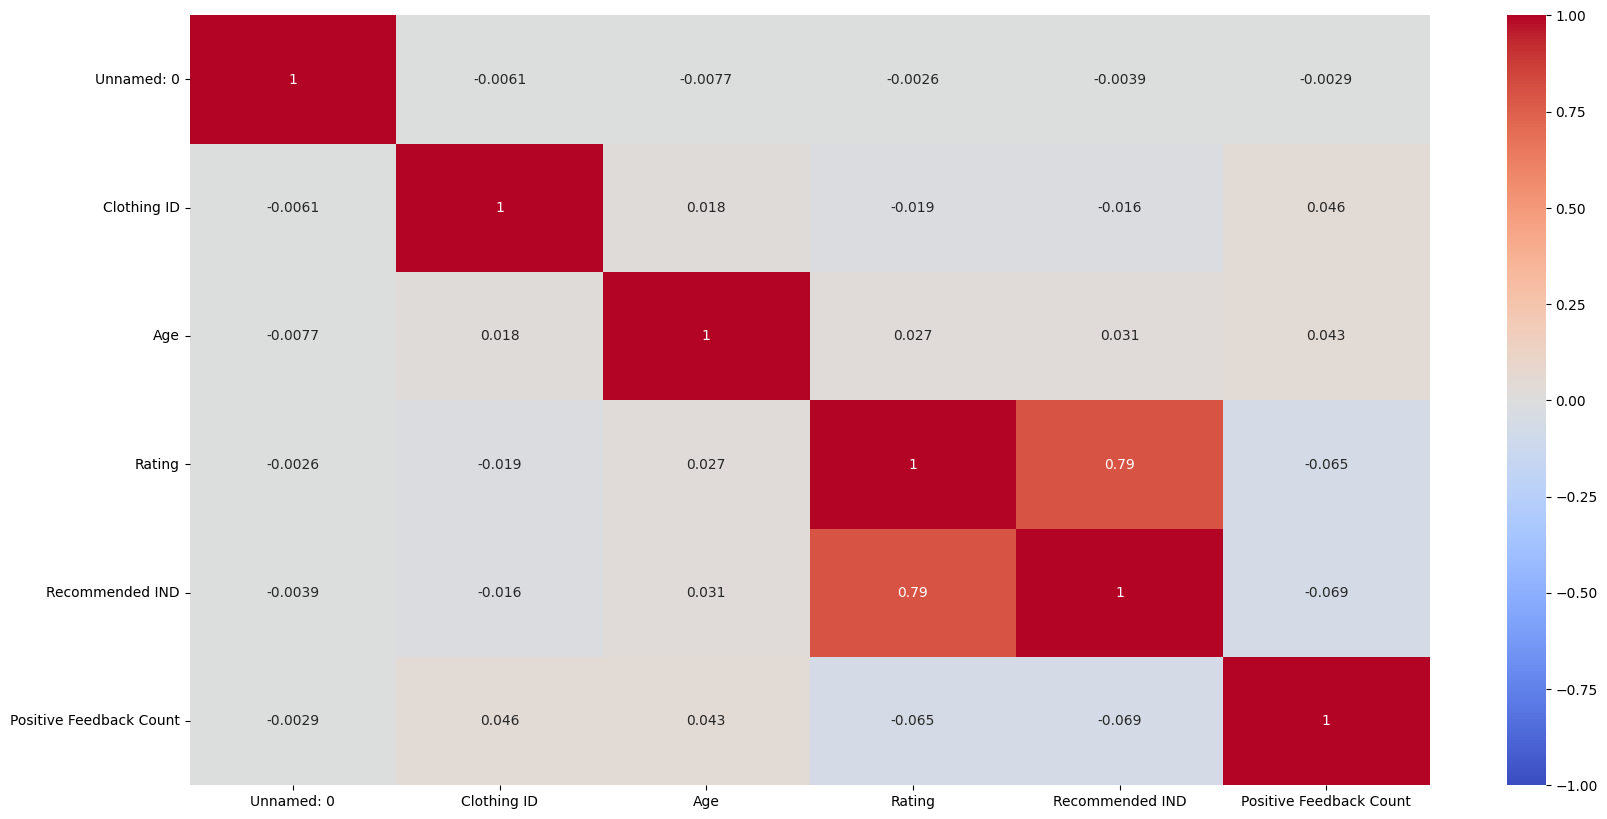

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, cmap="coolwarm")

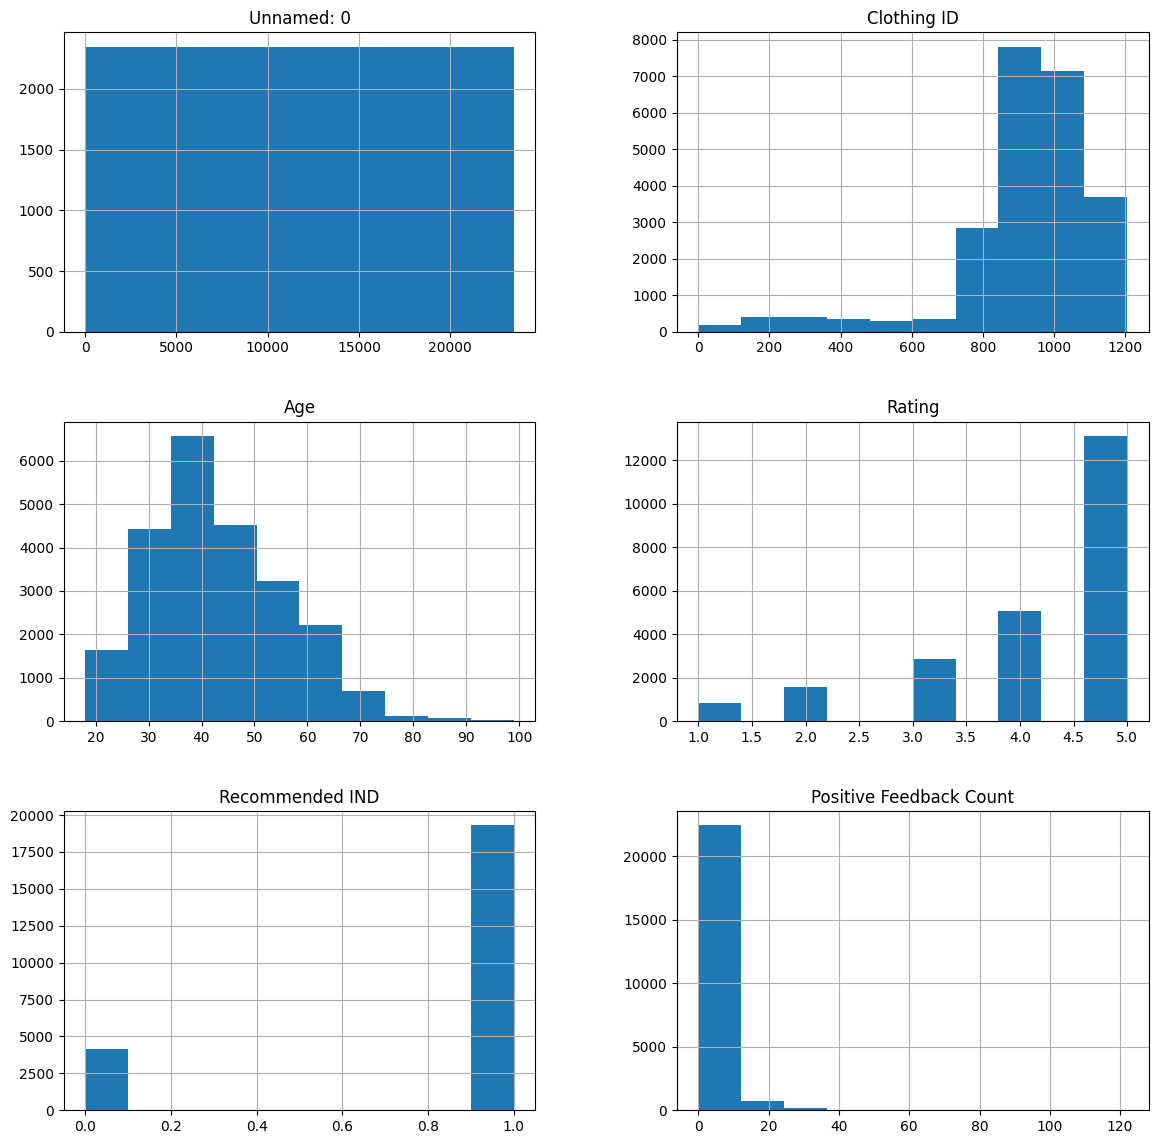

In [ ]:
# Plot histogram
df.hist(figsize=(14,14))
plt.show()

### Data Wrangling

In [ ]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [ ]:
df.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.head(1)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates


#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [ ]:
df["Recommended IND"].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

In [ ]:
df["Recommended IND"].describe().T


count    23486.000000
mean         0.822362
std          0.382216
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Recommended IND, dtype: float64

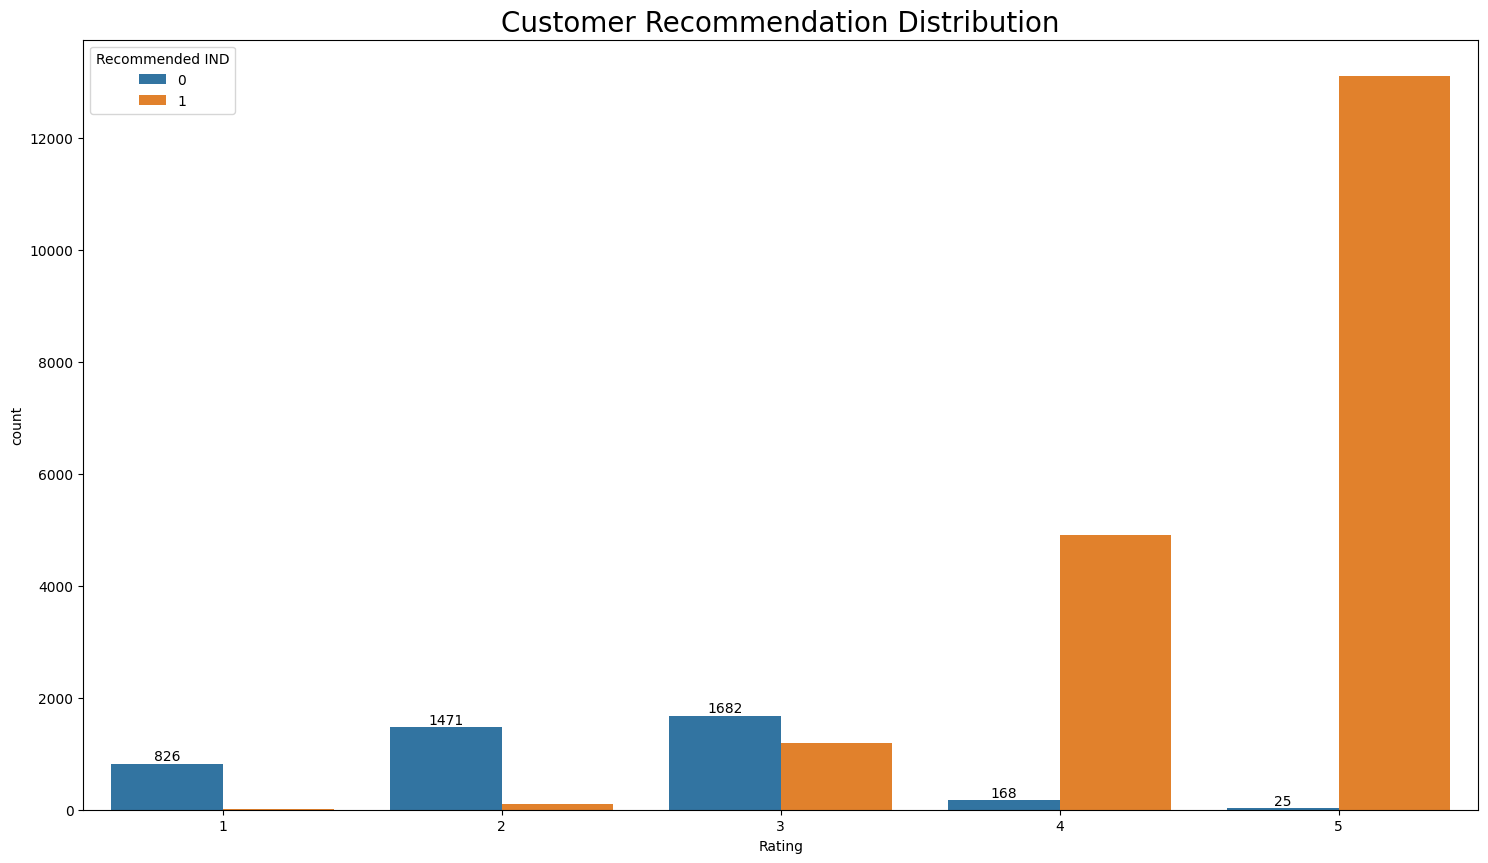

In [ ]:
plt.figure(figsize=(18, 10))

ax = sns.countplot(data =df, x = "Rating", hue = "Recommended IND")
plt.title('Customer Recommendation Distribution', fontsize=20)
ax.bar_label(ax.containers[0]);

# We are visualizing the number of the classes.

In [ ]:
df = df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 2) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 3) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 4) & (df["Recommended IND"] == 0))]
df = df[~((df["Rating"] == 5) & (df["Recommended IND"] == 0))]

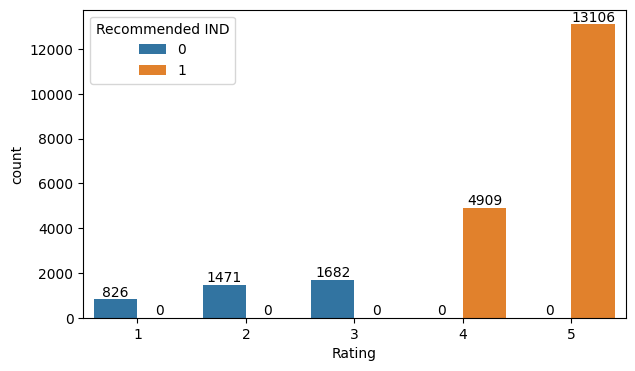

In [ ]:
plt.figure(figsize = (7,4))
ax = sns.countplot(x="Rating",
                   data=df,
                   hue = "Recommended IND")
for p in ax.containers:
  ax.bar_label(p)

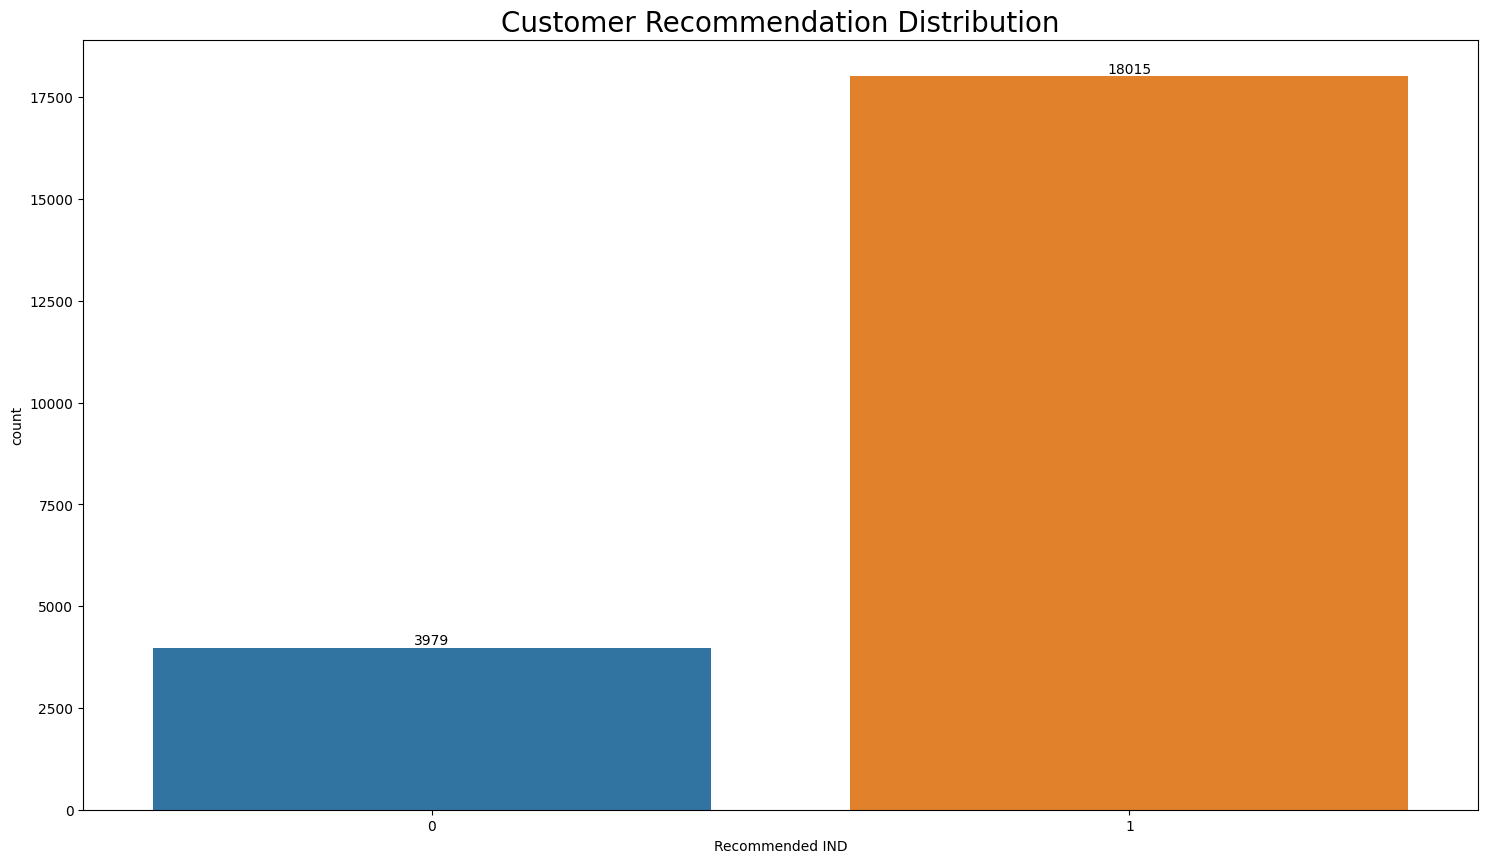

In [ ]:
plt.figure(figsize=(18, 10))

ax = sns.countplot(data =df, x = "Recommended IND")
plt.title('Customer Recommendation Distribution', fontsize=20)
ax.bar_label(ax.containers[0]);

# We are visualizing the number of the classes.

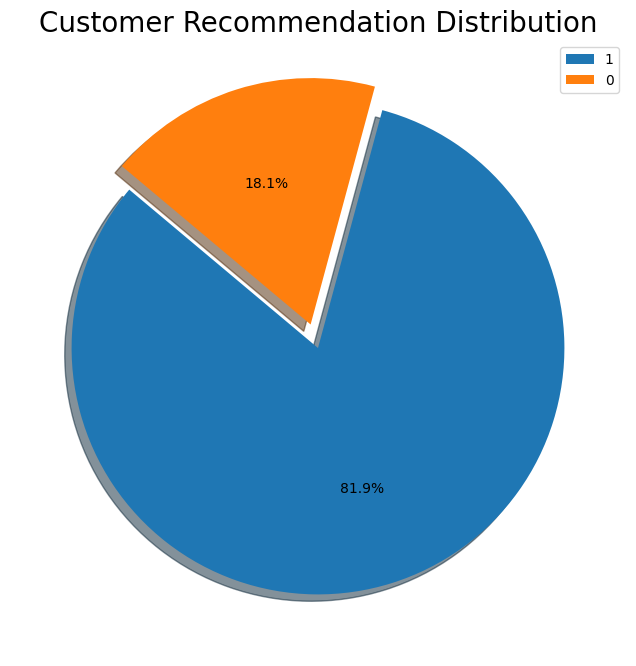

In [ ]:
plt.figure(figsize=(8, 8))

explode = [0, 0.1]
plt.pie(df["Recommended IND"].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['1', '0'])
plt.title('Customer Recommendation Distribution', fontsize=20)
plt.axis('off');

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name



In [ ]:
df_ml = df.copy()

In [ ]:
df_ml =df_ml[["Review Text", "Recommended IND"]]
df_ml.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comfortable,1
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",1
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",0
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",1
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,1


In [ ]:
df_ml.columns = df_ml.columns.str.lower().str.replace(' ', '_')
df_ml.columns

Index(['review_text', 'recommended_ind'], dtype='object')

---
---


### Missing Value Detection

In [ ]:
df_ml['review_text'].isnull().value_counts()

False    21175
True       819
Name: review_text, dtype: int64

In [ ]:
df_ml['recommended_ind'].isnull().value_counts()

False    21994
Name: recommended_ind, dtype: int64

In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21994 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   review_text      21175 non-null  object
 1   recommended_ind  21994 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 515.5+ KB


In [ ]:
df_ml.dropna(inplace = True)
df_ml.reset_index(drop=True,
               inplace=True)
df_ml

,review_text,recommended_ind
0,Absolutely wonderful - silky and sexy and comfortable,1
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",1
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",0
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",1
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,1
...,...,...
21170,I was surprised at the positive reviews for this product. its terrible! it cuts you in a weird place to make you look wide. the skirt is also not like the picture. its darker and heavier. the material isnt great. i had to return.,0
21171,"So i wasn't sure about ordering this skirt because i couldn't see it in person first but i'm so glad i did. the skirt and design is well made and doesn't look or feel cheap. the color isn't blaring, offensive red so it worked with my pale skin better than i anticipated. i wore it to my daughter's dance production with tall boots and a sweater and i got numerous compliments. fit is true, i am 5'2"" and i picked the petite length. the skirt has a slight a-line rather than a tight pencil fit but the",1
21172,I was very happy to snag this dress at such a great price! it's very easy to slip on and has a very flattering cut and color combo.,1
21173,"This fit well, but the top was very see through. this never would have worked for me. i'm glad i was able to try it on in the store and didn't order it online. with different fabric, it would have been great.",0


In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21175 entries, 0 to 21174
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   review_text      21175 non-null  object
 1   recommended_ind  21175 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 331.0+ KB


In [ ]:
df_ml['review_text'].isnull().value_counts()

False    21175
Name: review_text, dtype: int64

In [ ]:
df_ml['recommended_ind'].isnull().value_counts()

False    21175
Name: recommended_ind, dtype: int64

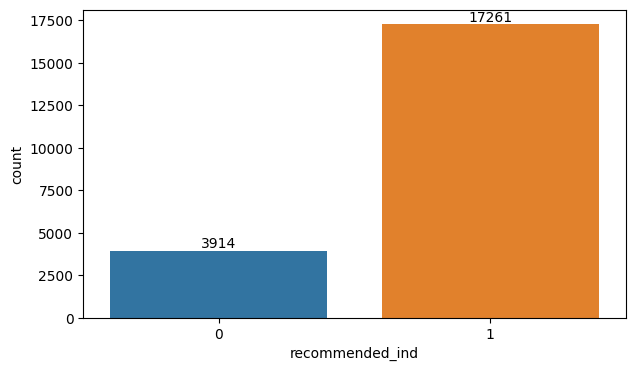

In [ ]:
plt.fig = plt.figure(figsize = (7,4))
ax = sns.countplot(x="recommended_ind",
                   data=df_ml)
ax.bar_label(ax.containers[0]);

In [ ]:
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

In [ ]:
missing_values(df_ml)

,Missing_Number,Missing_Percent


In [ ]:
# to detect missing values if they consist of empty (blank)
df_ml["review_text"].str.isspace().sum()

0

In [ ]:
df_ml[df_ml["review_text"].str.isspace() == True].index

Int64Index([], dtype='int64')

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [ ]:
stop_words = stopwords.words('english')

for i in ["not", "no"]:
        stop_words.remove(i)

In [ ]:
def cleaning(data):

    #1. Remove Puncs
    text = re.sub('[^\w\s]','', data)

    #2. Tokenize and lower
    text_tokens = word_tokenize(data.replace("'", "").lower())

    #3. Remove Punctuation and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #5. Normalization-Lemmatization
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    #joining
    return " ".join(text_cleaned)

In [ ]:
df_ml["review_text"] = df_ml["review_text"].apply(cleaning)
df_ml["review_text"].head()

0                                                                                                                                                                                                                                                                       absolutely wonderful silky sexy comfortable
1                                                                                                                              love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
2    high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c
3                                                                           

In [ ]:
df_ml.head()

,review_text,recommended_ind
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite,1
2,high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c,0
3,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment,1
4,shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt,1


In [ ]:
" ".join(df_ml["review_text"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'not',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'complime

In [ ]:
word_values = pd.Series(" ".join(df_ml["review_text"]).split()).value_counts()
word_values

dress          10524
fit             9487
not             9098
size            8665
love            8643
               ...  
lark               1
somethings         1
inexcusable        1
someth             1
platinum           1
Length: 11647, dtype: int64

In [ ]:
rare_words = word_values[word_values <= 2]
rare_words

india          2
upsize         2
gravity        2
preparing      2
hmm            2
              ..
lark           1
somethings     1
inexcusable    1
someth         1
platinum       1
Length: 6329, dtype: int64

In [ ]:
rare_words.value_counts()

1    4892
2    1437
dtype: int64

In [ ]:
# to remove rare_words (appears two times or less)
df_ml["review_text"] = df_ml["review_text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
df_ml["review_text"].head()

0                                                                                                                                                                                                                                                          absolutely wonderful silky sexy comfortable
1                                                                                                                 love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
2    high hope dress really wanted work initially ordered petite small usual size found small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c
3                                                                                                                  

In [ ]:
sum(df_ml.duplicated())
# There are 9  duplicated rows in corpus

9

In [ ]:
df_ml=df_ml.drop_duplicates()
# we remove the duplicated rows

In [ ]:
df_ml.reset_index(drop=True, inplace=True)
# We reset the index because we remove duplicated rows.

In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21166 entries, 0 to 21165
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   review_text      21166 non-null  object
 1   recommended_ind  21166 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 330.8+ KB


## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [ ]:
positive_sen = df_ml[df_ml["recommended_ind"] == 1]["review_text"]
positive_sen

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        basket hte last see would look like person sto...
                               ...                        
21159    bottom cute defiantly cheeky would recommend s...
21160    im impressed beautiful color combination embro...
21162    wasnt sure ordering skirt couldnt see person f...
21163    happy snag dress great price easy slip flatter...
21165    dress lovely feminine fit perfectly easy wear ...
Name: review_text, Length: 17253, dtype: object

In [ ]:
negative_sen = df_ml[df_ml["recommended_ind"] == 0]["review_text"]
negative_sen

2        high hope dress really wanted work initially o...
5        love tracy reese dress one not petite foot tal...
10       dress run small esp zipper area run ordered sp...
20       first not pullover styling side zipper wouldnt...
22       loved material didnt really look long dress pu...
                               ...                        
21136    tried color really pretty fun want pair pant l...
21137    wanted love jacket soft great color unfortunat...
21146    purchased good price typically love maeve fabr...
21161    surprised positive review product terrible cut...
21164    fit well top see never would worked im glad ab...
Name: review_text, Length: 3913, dtype: object

In [ ]:
df_ml["recommended_ind"].value_counts()

1    17253
0     3913
Name: recommended_ind, dtype: int64

### Collect Words (positive and negative separately)

In [ ]:
pos_words = " ".join(positive_sen)
pos_words[:1000]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt basket hte last see would look like person store pick went teh color pale hte color really gorgeous turn trying little baggy hte x hte size bummer no petite decided though said everything pant skirt trying kept ordered carbon store pick ton stuff always try used top pair skirt pant everything went color really nice charcoal shimmer went well pencil skirt flare pant etc bit big sleeve long doesnt go petite also bit loose no xx kept wil later since light color already sold hte smallest size love dress usually get x run little snug bust ordered size flattering feminine u

In [ ]:
neg_words = " ".join(negative_sen)
neg_words[:1000]

'high hope dress really wanted work initially ordered petite small usual size found small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love tracy reese dress one not petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alteration shortening skirt would take away embellishment garment love color idea style not work returned dress dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back first not pullover styling side zipper wouldnt purchased knew side zipper large bust side zipper next impossible second tulle feel look cheap slip awkward tight shape underneath not look like described sadly returning im sure find something exchange l

In [ ]:
" ".join(df_ml["review_text"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'small',
 'small',
 'fact',
 'could',
 'not',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 '

In [ ]:
neg_words_split= " ".join(df_ml[df_ml["recommended_ind"] == 0].review_text).split()
neg_words_split

['high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'small',
 'small',
 'fact',
 'could',
 'not',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'tracy',
 'reese',
 'dress',
 'one',
 'not',
 'petite',
 'foot',
 'tall',
 'usually',
 'wear',
 'brand',
 'dress',
 'pretty',
 'package',
 'lot',
 'dress',
 'skirt',
 'long',
 'full',
 'overwhelmed',
 'small',
 'frame',
 'not',
 'stranger',
 'alteration',
 'shortening',
 'skirt',
 'would',
 'take',
 'away',
 'embellishment',
 'garment',
 'love',
 'color',
 'idea',
 'style',
 'not',
 'work',
 'returned',
 'dress',
 'dress',
 'run',
 'small',
 'esp',
 'zipper',
 'area',
 'run',
 'ordered',
 'sp',
 'typically'

In [ ]:
pos_words_split =" ".join(df_ml[df_ml["recommended_ind"] == 1].review_text).split()
pos_words_split

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flattering',
 'due',
 'adjustable',
 'front',
 'tie',
 'perfect',
 'length',
 'wear',
 'legging',
 'sleeveless',
 'pair',
 'well',
 'cardigan',
 'love',
 'shirt',
 'basket',
 'hte',
 'last',
 'see',
 'would',
 'look',
 'like',
 'person',
 'store',
 'pick',
 'went',
 'teh',
 'color',
 'pale',
 'hte',
 'color',
 'really',
 'gorgeous',
 'turn',
 'trying',
 'little',
 'baggy',
 'hte',
 'x',
 'hte',
 'size',
 'bummer',
 'no',
 'petite',
 'decided',
 'though',
 'said',
 'everythi

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

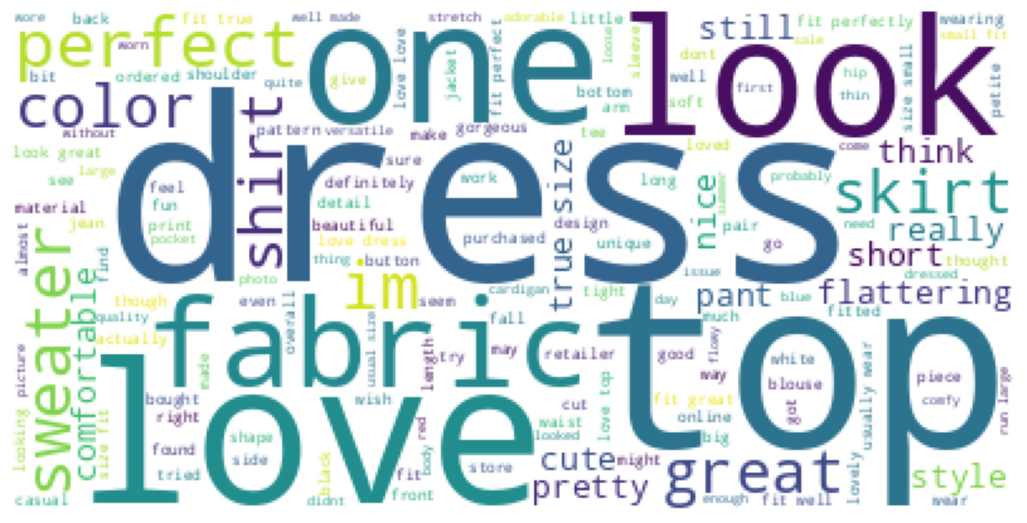

In [ ]:
wordcloud_pos = WordCloud(background_color="white", max_words =250).generate(pos_words)

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud_pos)
plt.axis("off")
plt.show()

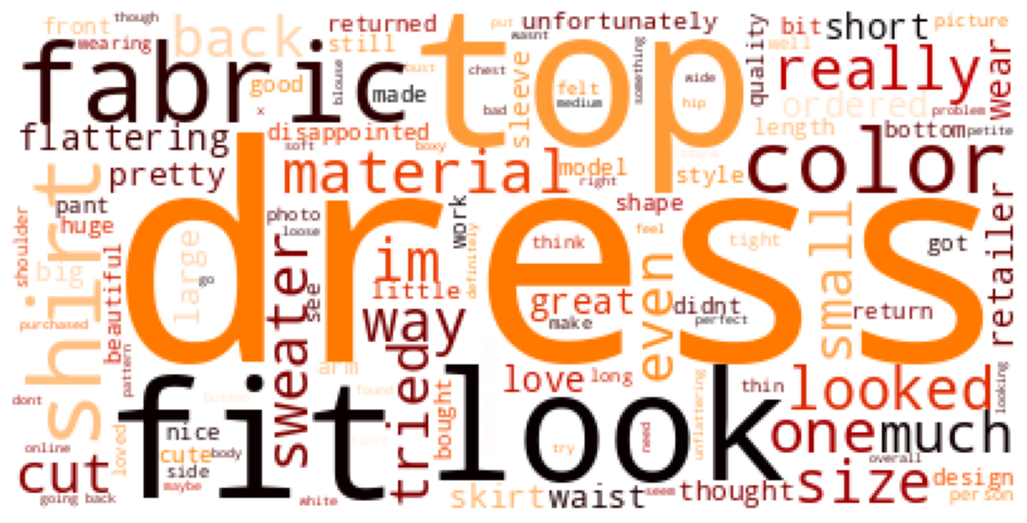

In [ ]:
wordcloud_neg = WordCloud(background_color="white", max_words =250, colormap='gist_heat').generate(neg_words)

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud_neg)
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_ml["review_text"].values
y = df_ml["recommended_ind"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=101)

### Count Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3, max_df=0.90)
X_train_countVec = vectorizer.fit_transform(X_train)
X_test_countVec = vectorizer.transform(X_test)

In [ ]:
df_train_count = pd.DataFrame(X_train_countVec.toarray(), columns = vectorizer.get_feature_names_out())
df_train_count

In [ ]:
df_test_count = pd.DataFrame(X_test_countVec.toarray(), columns = vectorizer.get_feature_names_out())
df_test_count

In [ ]:
vectorizer.vocabulary_

### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3, max_df=0.90)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [ ]:
tf_idf_vectorizer.get_feature_names_out()

In [ ]:
df_train_tfidf = pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())
df_train_tfidf

In [ ]:
X_train[12]

In [ ]:
df_test_tfidf=pd.DataFrame(X_test_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())
df_test_tfidf

### Eval Function

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, ConfusionMatrixDisplay

In [ ]:
def eval(model, X_train, X_test,y_train, y_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    print ("\nConfusion Matrix--------------------------------------------")
    print(confusion_matrix(y_test, y_pred))
    ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)
    print("\nTest_Set Results-------------------------------------------")
    print(classification_report(y_test,y_pred))
    print("\nTrain_Set Results -----------------------------------------")
    print(classification_report(y_train,y_pred_train))

## Logistic Regression

### CountVectorizer

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_Reg = LogisticRegression(C = 0.6, max_iter=1000, class_weight= "balanced", random_state=101)
log_Reg.fit(X_train_countVec,y_train)

LogisticRegression(C=0.6, class_weight='balanced', max_iter=1000,
                   random_state=101)

Logistic Regression MODEL with CountVectorizer

Confusion Matrix--------------------------------------------
[[ 315   76]
 [ 149 1577]]

Test_Set Results-------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.81      0.74       391
           1       0.95      0.91      0.93      1726

    accuracy                           0.89      2117
   macro avg       0.82      0.86      0.84      2117
weighted avg       0.90      0.89      0.90      2117


Train_Set Results -----------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.97      0.86      3522
           1       0.99      0.94      0.96     15527

    accuracy                           0.94     19049
   macro avg       0.88      0.95      0.91     19049
weighted avg       0.95      0.94      0.95     19049



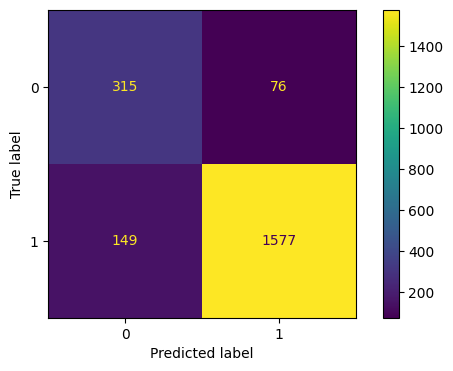

In [ ]:
print("Logistic Regression MODEL with CountVectorizer")
eval(log_Reg, X_train_countVec, X_test_countVec,y_train, y_test)

In [ ]:
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-0': make_scorer(precision_score, average=None, labels=[0]),
            'recall-0': make_scorer(recall_score, average=None, labels = [0]),
            'f1-0': make_scorer(f1_score, average=None, labels = [0])}

In [ ]:
log_Reg = LogisticRegression(C = 0.6, max_iter=1000, class_weight= "balanced", random_state=101)
scores = cross_validate(log_Reg, X_train_countVec, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy        0.894168
train_accuracy       0.944360
test_precision-0     0.673991
train_precision-0    0.780870
test_recall-0        0.828785
train_recall-0       0.971796
test_f1-0            0.743166
train_f1-0           0.865930
dtype: float64

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall

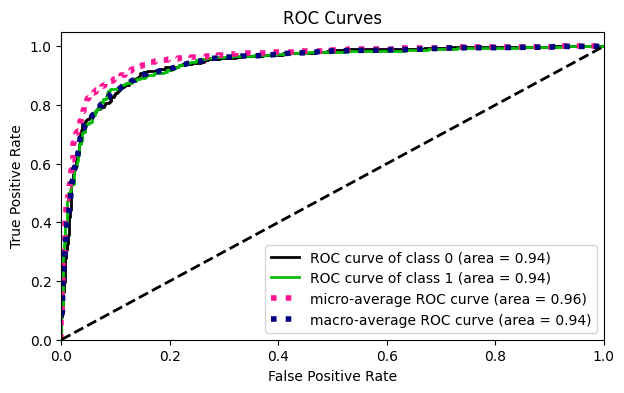

In [ ]:
log_Reg = LogisticRegression(C = 0.6, max_iter=1000, class_weight= "balanced", random_state=101)

log_Reg.fit(X_train_countVec, y_train)

y_pred_proba = log_Reg.predict_proba(X_test_countVec)

plot_roc(y_test, y_pred_proba)
plt.show();

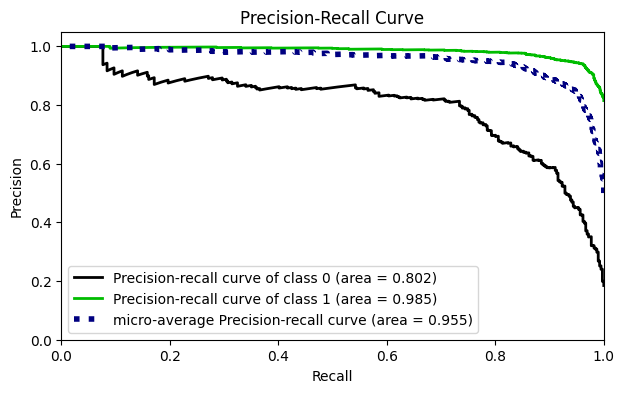

In [ ]:
y_pred_proba = log_Reg.predict_proba(X_test_countVec)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = log_Reg.predict(X_test_countVec)
y_test_dummies = pd.get_dummies(y_test).values
y_pred_proba = log_Reg.predict_proba(X_test_countVec)

log_Reg_countVec_rec_0 = recall_score(y_test, y_pred, labels = [0], average = None)
log_Reg_countVec_f1_0 = f1_score(y_test, y_pred, labels = [0], average = None)
log_Reg_countVec_AP_0 = average_precision_score(y_test_dummies[:, 0], y_pred_proba[:, 0])
log_Reg_countVec_auc_0 = roc_auc_score(y_test_dummies[:, 0], y_pred_proba[:,0])

In [ ]:
print("Logistic Regression model with the CountVectorizer results:")
print(f"AP: {log_Reg_countVec_AP_0} \nAUC: {log_Reg_countVec_auc_0} \nF1_score: {log_Reg_countVec_f1_0[0]}, \nRecall: {log_Reg_countVec_rec_0[0]}")

Logistic Regression model with the CountVectorizer results:
AP: 0.8019623959876168 
AUC: 0.9421959322295093 
F1_score: 0.736842105263158, 
Recall: 0.8056265984654731


In [ ]:
compare = pd.DataFrame({"Model": "logistic Regression with CountVectorizer",
           "F1": log_Reg_countVec_f1_0,
           "Recall": log_Reg_countVec_rec_0,
            "AP": log_Reg_countVec_AP_0,
            "ROC_AUC":log_Reg_countVec_auc_0})

In [ ]:
# Save the DataFrame to a CSV file
csv_file_path = '/content/comapre.csv'
compare.to_csv(csv_file_path, index=False)
compare

,Model,F1,Recall,AP,ROC_AUC
0,logistic Regression with CountVectorizer,0.736842,0.805627,0.801962,0.942196


### TF-IDF

In [ ]:
log_Reg = LogisticRegression(C = 0.6, max_iter=1000, class_weight= "balanced", random_state=101)
log_Reg.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.6, class_weight='balanced', max_iter=1000,
                   random_state=101)

Logistic Regression MODEL with TF-IDF MODEL

Confusion Matrix--------------------------------------------
[[ 343   48]
 [ 195 1531]]

Test_Set Results-------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.88      0.74       391
           1       0.97      0.89      0.93      1726

    accuracy                           0.89      2117
   macro avg       0.80      0.88      0.83      2117
weighted avg       0.91      0.89      0.89      2117


Train_Set Results -----------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.94      0.79      3522
           1       0.98      0.90      0.94     15527

    accuracy                           0.91     19049
   macro avg       0.83      0.92      0.87     19049
weighted avg       0.93      0.91      0.91     19049



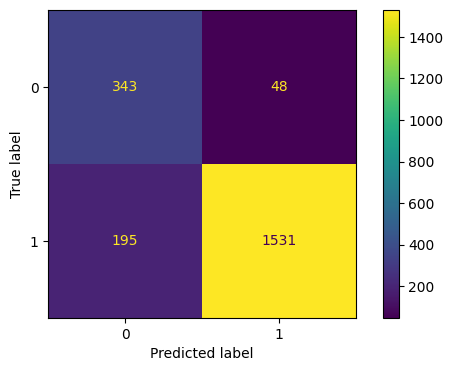

In [ ]:
print("Logistic Regression MODEL with TF-IDF MODEL")
eval(log_Reg, X_train_tf_idf, X_test_tf_idf, y_train, y_test)

In [ ]:
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-0': make_scorer(precision_score, average=None, labels=[0]),
            'recall-0': make_scorer(recall_score, average=None, labels = [0]),
            'f1-0': make_scorer(f1_score, average=None, labels = [0])}

In [ ]:
log_Reg = LogisticRegression(C = 0.6, max_iter=1000, class_weight= "balanced", random_state=101)
scores = cross_validate(log_Reg, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy        0.888708
train_accuracy       0.907922
test_precision-0     0.646836
train_precision-0    0.683144
test_recall-0        0.877052
train_recall-0       0.936242
test_f1-0            0.744447
train_f1-0           0.789913
dtype: float64

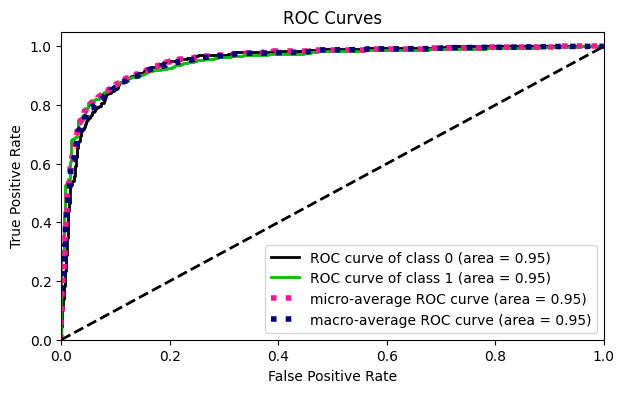

In [ ]:
log_Reg = LogisticRegression(C = 0.6, max_iter=1000, class_weight= "balanced", random_state=101)

log_Reg.fit(X_train_tf_idf, y_train)

y_pred_proba = log_Reg.predict_proba(X_test_tf_idf)

plot_roc(y_test, y_pred_proba)
plt.show();

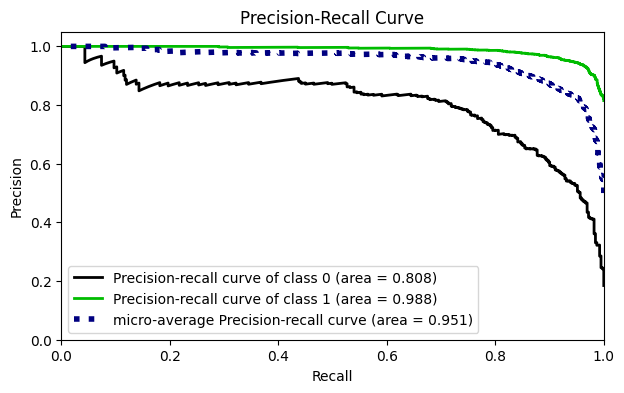

In [ ]:
y_pred_proba = log_Reg.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = log_Reg.predict(X_test_tf_idf)
y_test_dummies = pd.get_dummies(y_test).values
y_pred_proba = log_Reg.predict_proba(X_test_tf_idf)

log_Reg_tf_idf_rec_0 = recall_score(y_test, y_pred, labels = [0], average = None)
log_Reg_tf_idf_f1_0 = f1_score(y_test, y_pred, labels = [0], average = None)
log_Reg_tf_idf_AP_0 = average_precision_score(y_test_dummies[:, 0], y_pred_proba[:, 0])
log_Reg_tf_idf_auc_0 = roc_auc_score(y_test_dummies[:, 0], y_pred_proba[:,0])

In [ ]:
print("Logistic Regression model with the TF-IDF results:")
print(f"AP: {log_Reg_tf_idf_AP_0} \nAUC: {log_Reg_tf_idf_auc_0} \nF1_score: {log_Reg_tf_idf_f1_0[0]}, \nRecall: {log_Reg_tf_idf_rec_0[0]}")

Logistic Regression model with the TF-IDF results:
AP: 0.8078038430976007 
AUC: 0.9497485426736567 
F1_score: 0.7384284176533907, 
Recall: 0.8772378516624041


In [ ]:
new_model = {
    "Model": "Logistic Regression with  TF-IDF",
    "F1": log_Reg_tf_idf_f1_0[0],
    "Recall": log_Reg_tf_idf_rec_0[0],
    "AP": log_Reg_tf_idf_AP_0,
    "ROC_AUC": log_Reg_tf_idf_auc_0
}

In [ ]:
csv_file_path = '/content/comapre.csv'

# Load the DataFrame from CSV file
compare = pd.read_csv(csv_file_path)

#append the result
compare = compare.append(new_model, ignore_index=True)

# Save the DataFrame to a CSV file
compare.to_csv(csv_file_path, index=False)

In [ ]:
compare

,Model,F1,Recall,AP,ROC_AUC
0,logistic Regression with CountVectorizer,0.736842,0.805627,0.801962,0.942196
1,Logistic Regression with TF-IDF,0.738428,0.877238,0.807804,0.949749


## Naive Bayes

### Countvectorizer

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
nb_model = BernoulliNB(alpha=10)
nb_model.fit(X_train_countVec,y_train)

BernoulliNB(alpha=10)

Naive Bayes MODEL with CountVectorizer

Confusion Matrix--------------------------------------------
[[  91  300]
 [  24 1702]]

Test_Set Results-------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.23      0.36       391
           1       0.85      0.99      0.91      1726

    accuracy                           0.85      2117
   macro avg       0.82      0.61      0.64      2117
weighted avg       0.84      0.85      0.81      2117


Train_Set Results -----------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.29      0.43      3522
           1       0.86      0.98      0.92     15527

    accuracy                           0.86     19049
   macro avg       0.84      0.64      0.67     19049
weighted avg       0.85      0.86      0.83     19049



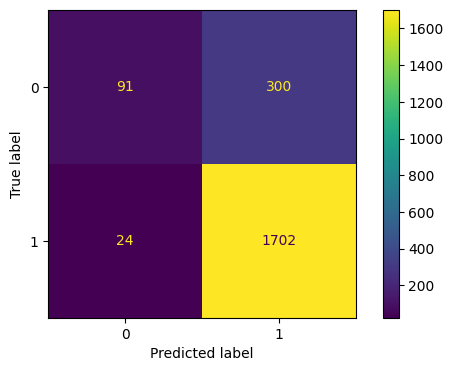

In [ ]:
print("Naive Bayes MODEL with CountVectorizer")
eval(nb_model, X_train_countVec, X_test_countVec,y_train, y_test)

In [ ]:
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-0': make_scorer(precision_score, average=None, labels=[0]),
            'recall-0': make_scorer(recall_score, average=None, labels = [0]),
            'f1-0': make_scorer(f1_score, average=None, labels = [0])}

In [ ]:
nb_model = BernoulliNB(alpha=10)
scores = cross_validate(nb_model, X_train_countVec, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy        0.844559
train_accuracy       0.850823
test_precision-0     0.792658
train_precision-0    0.833225
test_recall-0        0.216358
train_recall-0       0.241529
test_f1-0            0.339434
train_f1-0           0.374494
dtype: float64

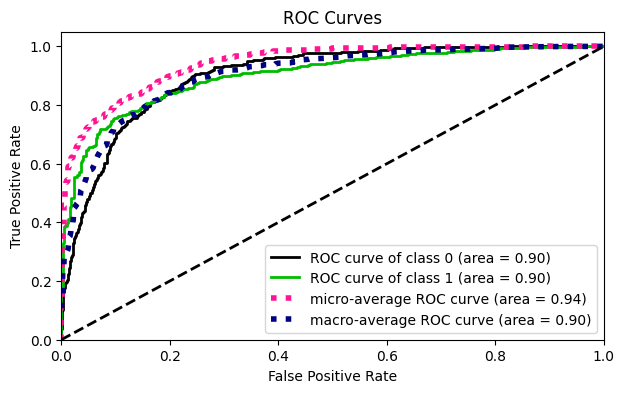

In [ ]:
nb_model = BernoulliNB(alpha=10)
nb_model.fit(X_train_countVec,y_train)

y_pred_proba = nb_model.predict_proba(X_test_countVec)

plot_roc(y_test, y_pred_proba)
plt.show();

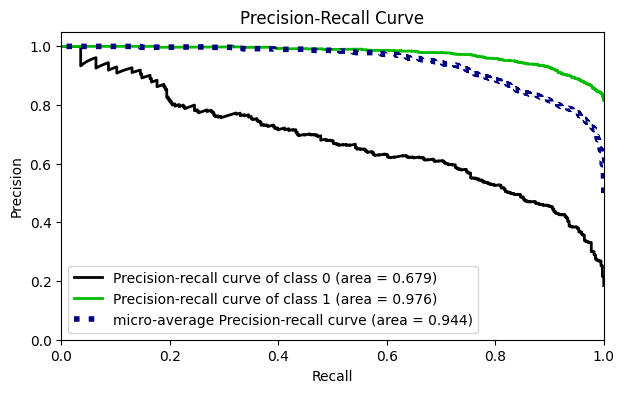

In [ ]:
y_pred_proba = nb_model.predict_proba(X_test_countVec)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = nb_model.predict(X_test_countVec)
y_test_dummies = pd.get_dummies(y_test).values
y_pred_proba = nb_model.predict_proba(X_test_countVec)

nb_countVec_rec_0 = recall_score(y_test, y_pred, labels = [0], average = None)
nb_countVec_f1_0 = f1_score(y_test, y_pred, labels = [0], average = None)
nb_countVec_AP_0 = average_precision_score(y_test_dummies[:, 0], y_pred_proba[:, 0])
nb_countVec_auc_0 = roc_auc_score(y_test_dummies[:, 0], y_pred_proba[:,0])

In [ ]:
print("Naive Bayes model with the CountVectorizer results:")
print(f"AP: {nb_countVec_AP_0} \nAUC: {nb_countVec_auc_0} \nF1_score: {nb_countVec_f1_0[0]}, \nRecall: {nb_countVec_rec_0[0]}")

Naive Bayes model with the CountVectorizer results:
AP: 0.6787503748341759 
AUC: 0.9019168249696977 
F1_score: 0.3596837944664032, 
Recall: 0.23273657289002558


In [ ]:
new_model = {
    "Model": "Naive Bayes with CountVectorizer",
    "F1": nb_countVec_f1_0[0],
    "Recall": nb_countVec_rec_0[0],
    "AP": nb_countVec_AP_0,
    "ROC_AUC": nb_countVec_auc_0
}

csv_file_path = '/content/comapre.csv'

# Load the DataFrame from CSV file
compare = pd.read_csv(csv_file_path)

#append the result
compare = compare.append(new_model, ignore_index=True)

# Save the DataFrame to a CSV file
compare.to_csv(csv_file_path, index=False)

In [ ]:
compare

,Model,F1,Recall,AP,ROC_AUC
0,logistic Regression with CountVectorizer,0.736842,0.805627,0.801962,0.942196
1,Logistic Regression with TF-IDF,0.738428,0.877238,0.807804,0.949749
2,Naive Bayes with CountVectorizer,0.359684,0.232737,0.678750,0.901917


### TF-IDF

In [ ]:
nb_model = BernoulliNB(alpha=10)
nb_model.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=10)

Naive Bayes MODEL with TF-IDF

Confusion Matrix--------------------------------------------
[[  91  300]
 [  24 1702]]

Test_Set Results-------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.23      0.36       391
           1       0.85      0.99      0.91      1726

    accuracy                           0.85      2117
   macro avg       0.82      0.61      0.64      2117
weighted avg       0.84      0.85      0.81      2117


Train_Set Results -----------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.29      0.43      3522
           1       0.86      0.98      0.92     15527

    accuracy                           0.86     19049
   macro avg       0.84      0.64      0.67     19049
weighted avg       0.85      0.86      0.83     19049



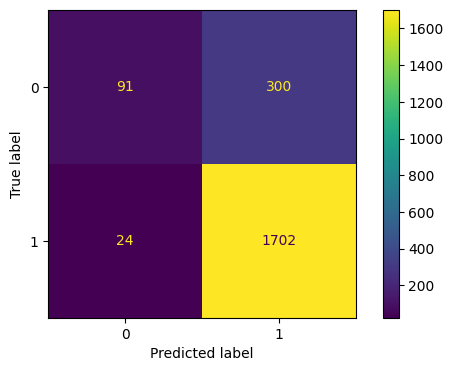

In [ ]:
print("Naive Bayes MODEL with TF-IDF")
eval(nb_model, X_train_tf_idf, X_test_tf_idf,y_train, y_test)

In [ ]:
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-0': make_scorer(precision_score, average=None, labels=[0]),
            'recall-0': make_scorer(recall_score, average=None, labels = [0]),
            'f1-0': make_scorer(f1_score, average=None, labels = [0])}

In [ ]:
nb_model = BernoulliNB(alpha=10)
scores = cross_validate(nb_model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy        0.844559
train_accuracy       0.850823
test_precision-0     0.792658
train_precision-0    0.833225
test_recall-0        0.216358
train_recall-0       0.241529
test_f1-0            0.339434
train_f1-0           0.374494
dtype: float64

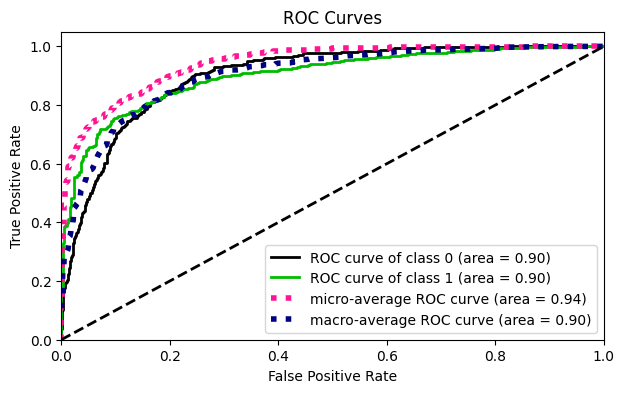

In [ ]:
nb_model = BernoulliNB(alpha=10)
nb_model.fit(X_train_tf_idf,y_train)

y_pred_proba = nb_model.predict_proba(X_test_tf_idf)

plot_roc(y_test, y_pred_proba)
plt.show();

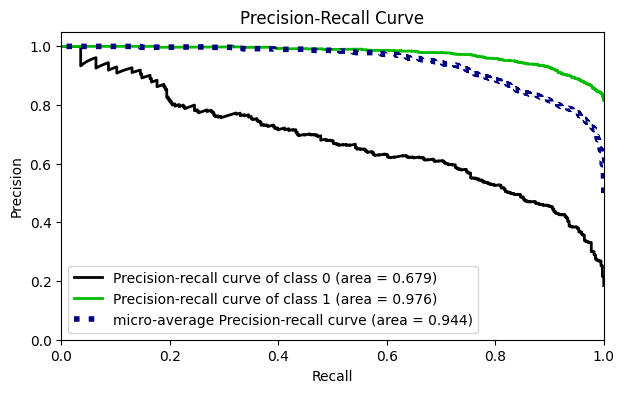

In [ ]:
y_pred_proba = nb_model.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = nb_model.predict(X_test_tf_idf)
y_test_dummies = pd.get_dummies(y_test).values
y_pred_proba = nb_model.predict_proba(X_test_tf_idf)

nb_tf_idf_rec_0 = recall_score(y_test, y_pred, labels = [0], average = None)
nb_tf_idf_f1_0 = f1_score(y_test, y_pred, labels = [0], average = None)
nb_tf_idf_AP_0 = average_precision_score(y_test_dummies[:, 0], y_pred_proba[:, 0])
nb_tf_idf_auc_0 = roc_auc_score(y_test_dummies[:, 0], y_pred_proba[:,0])

In [ ]:

print("Naive Bayes model with TF-IDF results:")
print(f"AP: {nb_tf_idf_AP_0} \nAUC: {nb_tf_idf_auc_0} \nF1_score: {nb_tf_idf_f1_0[0]}, \nRecall: {nb_tf_idf_rec_0[0]}")

Naive Bayes model with TF-IDF results:
AP: 0.6787503748341759 
AUC: 0.9019168249696977 
F1_score: 0.3596837944664032, 
Recall: 0.23273657289002558


In [ ]:
new_model = {
    "Model": "Naive Bayes with TF-IDF",
    "F1": nb_tf_idf_f1_0[0],
    "Recall": nb_tf_idf_rec_0[0],
    "AP": nb_tf_idf_AP_0,
    "ROC_AUC": nb_tf_idf_auc_0
}

csv_file_path = '/content/comapre.csv'

# Load the DataFrame from CSV file
compare = pd.read_csv(csv_file_path)

#append the result
compare = compare.append(new_model, ignore_index=True)

# Save the DataFrame to a CSV file
compare.to_csv(csv_file_path, index=False)

In [ ]:
compare

,Model,F1,Recall,AP,ROC_AUC
0,logistic Regression with CountVectorizer,0.736842,0.805627,0.801962,0.942196
1,Logistic Regression with TF-IDF,0.738428,0.877238,0.807804,0.949749
2,Naive Bayes with CountVectorizer,0.359684,0.232737,0.678750,0.901917
3,Naive Bayes with TF-IDF,0.359684,0.232737,0.678750,0.901917


## Support Vector Machine (SVM)

### Countvectorizer

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
svm = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
svm.fit(X_train_countVec,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

Support Vector Machine (SVM) MODEL with CountVectorizer

Confusion Matrix--------------------------------------------
[[ 334   57]
 [ 172 1554]]

Test_Set Results-------------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.85      0.74       391
           1       0.96      0.90      0.93      1726

    accuracy                           0.89      2117
   macro avg       0.81      0.88      0.84      2117
weighted avg       0.91      0.89      0.90      2117


Train_Set Results -----------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.94      0.81      3522
           1       0.99      0.91      0.95     15527

    accuracy                           0.92     19049
   macro avg       0.85      0.93      0.88     19049
weighted avg       0.94      0.92      0.92     19049



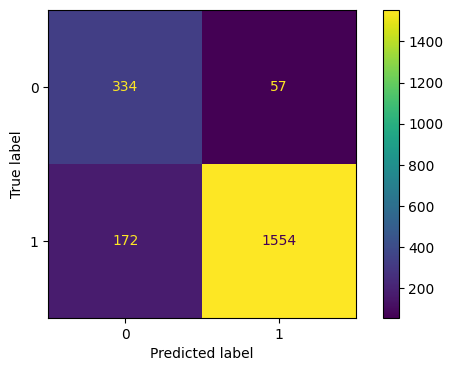

In [ ]:
print("Support Vector Machine (SVM) MODEL with CountVectorizer")
eval(svm, X_train_countVec, X_test_countVec,y_train, y_test)

In [ ]:
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-0': make_scorer(precision_score, average=None, labels=[0]),
            'recall-0': make_scorer(recall_score, average=None, labels = [0]),
            'f1-0': make_scorer(f1_score, average=None, labels = [0])}

In [ ]:
svm = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
scores = cross_validate(svm, X_train_countVec, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy        0.890388
train_accuracy       0.919716
test_precision-0     0.655499
train_precision-0    0.713519
test_recall-0        0.858883
train_recall-0       0.945359
test_f1-0            0.743344
train_f1-0           0.813236
dtype: float64

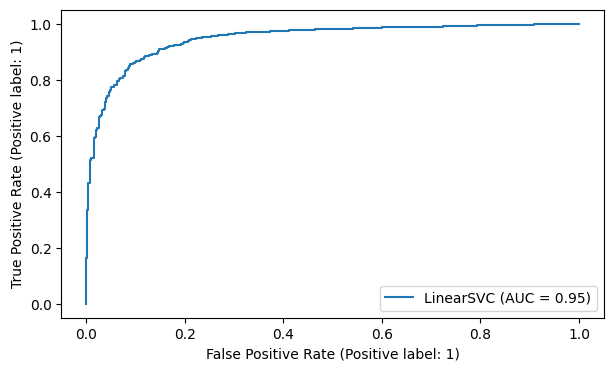

In [ ]:
svm = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
svm.fit(X_train_countVec,y_train)

RocCurveDisplay.from_estimator(svm,X_test_countVec, y_test);

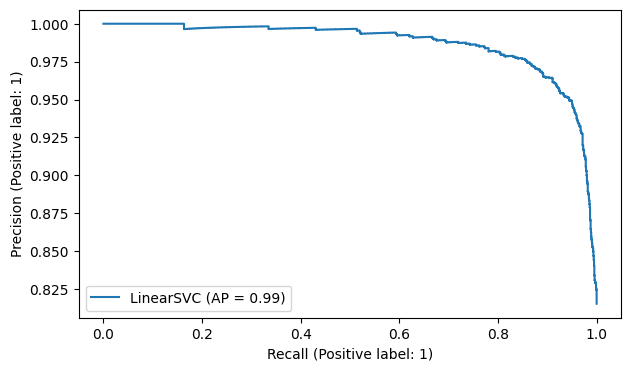

In [ ]:
PrecisionRecallDisplay.from_estimator(svm,
                                      X_test_countVec,
                                      y_test);

In [ ]:
y_pred = svm.predict(X_test_countVec)
decision_function= svm.decision_function(X_test_countVec)

svm_countVec_rec_0 = recall_score(y_test, y_pred, labels = [0], average = None)
svm_countVec_f1_0 = f1_score(y_test, y_pred, labels = [0], average = None)
svm_countVec_AP_0 = average_precision_score(y_test, decision_function)
svm_countVec_auc_0 = roc_auc_score(y_test, decision_function)

In [ ]:
print("Support Vector Machine (SVM) model with the CountVectorizer results:")
print(f"AP: {svm_countVec_AP_0} \nAUC: {svm_countVec_auc_0} \nF1_score: {svm_countVec_f1_0[0]}, \nRecall: {svm_countVec_rec_0[0]}")

Support Vector Machine (SVM) model with the CountVectorizer results:
AP: 0.9865453104246612 
AUC: 0.9466960848524004 
F1_score: 0.7447045707915273, 
Recall: 0.8542199488491049


In [ ]:
new_model = {
    "Model": "SVM with CountVectorizer",
    "F1": svm_countVec_f1_0[0],
    "Recall": svm_countVec_rec_0[0],
    "AP": svm_countVec_AP_0,
    "ROC_AUC": svm_countVec_auc_0
}

csv_file_path = '/content/comapre.csv'

# Load the DataFrame from CSV file
compare = pd.read_csv(csv_file_path)

#append the result
compare = compare.append(new_model, ignore_index=True)

# Save the DataFrame to a CSV file
compare.to_csv(csv_file_path, index=False)

In [ ]:
compare

,Model,F1,Recall,AP,ROC_AUC
0,logistic Regression with CountVectorizer,0.736842,0.805627,0.801962,0.942196
1,Logistic Regression with TF-IDF,0.738428,0.877238,0.807804,0.949749
2,Naive Bayes with CountVectorizer,0.359684,0.232737,0.678750,0.901917
3,Naive Bayes with TF-IDF,0.359684,0.232737,0.678750,0.901917
4,SVM with CountVectorizer,0.744705,0.854220,0.986545,0.946696


### TD-IDF

In [ ]:
svm = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
svm.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

Support Vector Machine (SVM) MODEL with TF-IDF

Confusion Matrix--------------------------------------------
[[ 343   48]
 [ 239 1487]]

Test_Set Results-------------------------------------------
              precision    recall  f1-score   support

           0       0.59      0.88      0.71       391
           1       0.97      0.86      0.91      1726

    accuracy                           0.86      2117
   macro avg       0.78      0.87      0.81      2117
weighted avg       0.90      0.86      0.87      2117


Train_Set Results -----------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.91      0.74      3522
           1       0.98      0.87      0.92     15527

    accuracy                           0.88     19049
   macro avg       0.80      0.89      0.83     19049
weighted avg       0.91      0.88      0.89     19049



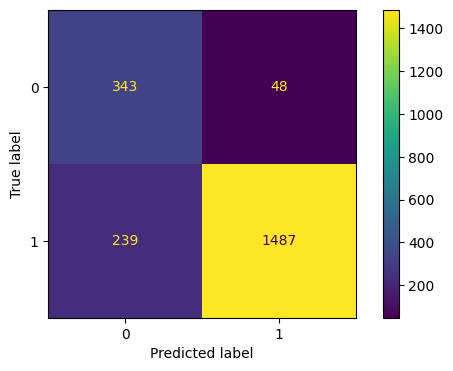

In [ ]:
print("Support Vector Machine (SVM) MODEL with TF-IDF")
eval(svm, X_train_tf_idf, X_test_tf_idf, y_train, y_test)

In [ ]:
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-0': make_scorer(precision_score, average=None, labels=[0]),
            'recall-0': make_scorer(recall_score, average=None, labels = [0]),
            'f1-0': make_scorer(f1_score, average=None, labels = [0])}

In [ ]:
svm = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
scores = cross_validate(svm, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy        0.871069
train_accuracy       0.880256
test_precision-0     0.603812
train_precision-0    0.619930
test_recall-0        0.881878
train_recall-0       0.910720
test_f1-0            0.716706
train_f1-0           0.737701
dtype: float64

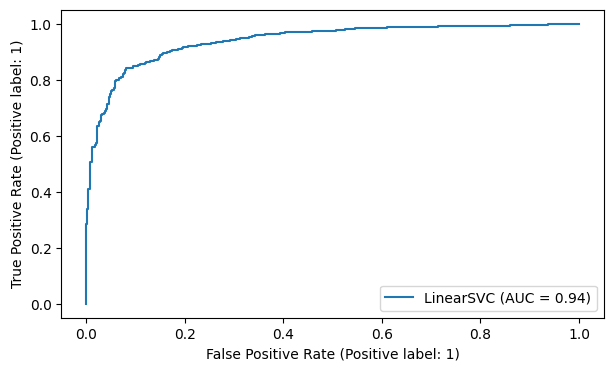

In [ ]:
svm = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
svm.fit(X_train_tf_idf,y_train)

RocCurveDisplay.from_estimator(svm,X_test_tf_idf, y_test);

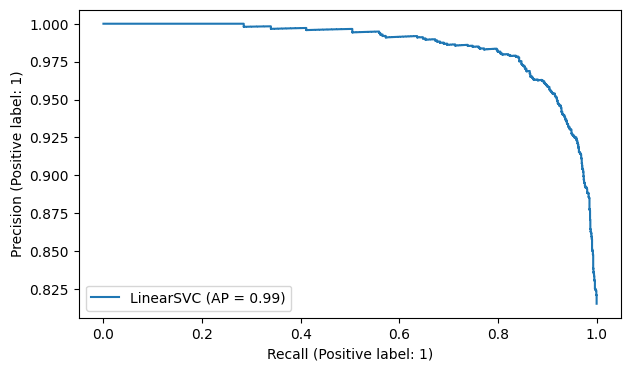

In [ ]:
PrecisionRecallDisplay.from_estimator(svm,
                                      X_test_tf_idf,
                                      y_test);

In [ ]:
y_pred = svm.predict(X_test_tf_idf)
decision_function= svm.decision_function(X_test_tf_idf)

svm_tf_idf_rec_0 = recall_score(y_test, y_pred, labels = [0], average = None)
svm_tf_idf_f1_0 = f1_score(y_test, y_pred, labels = [0], average = None)
svm_tf_idf_AP_0 = average_precision_score(y_test, decision_function)
svm_tf_idf_auc_0 = roc_auc_score(y_test, decision_function)

In [ ]:
print("Support Vector Machine (SVM) model with the TF-IDF results:")
print(f"AP: {svm_tf_idf_AP_0} \nAUC: {svm_tf_idf_auc_0} \nF1_score: {svm_tf_idf_f1_0[0]}, \nRecall: {svm_tf_idf_rec_0[0]}")

Support Vector Machine (SVM) model with the TF-IDF results:
AP: 0.9851526239607609 
AUC: 0.9394220482288336 
F1_score: 0.7050359712230216, 
Recall: 0.8772378516624041


In [ ]:
new_model = {
    "Model": "SVM with TF-IDF",
    "F1": svm_tf_idf_f1_0[0],
    "Recall": svm_tf_idf_rec_0[0],
    "AP": svm_tf_idf_AP_0,
    "ROC_AUC": svm_tf_idf_auc_0
}

csv_file_path = '/content/comapre.csv'

# Load the DataFrame from CSV file
compare = pd.read_csv(csv_file_path)

#append the result
compare = compare.append(new_model, ignore_index=True)

# Save the DataFrame to a CSV file
compare.to_csv(csv_file_path, index=False)
compare

,Model,F1,Recall,AP,ROC_AUC
0,logistic Regression with CountVectorizer,0.736842,0.805627,0.801962,0.942196
1,Logistic Regression with TF-IDF,0.738428,0.877238,0.807804,0.949749
2,Naive Bayes with CountVectorizer,0.359684,0.232737,0.678750,0.901917
3,Naive Bayes with TF-IDF,0.359684,0.232737,0.678750,0.901917
4,SVM with CountVectorizer,0.744705,0.854220,0.986545,0.946696
5,SVM with TF-IDF,0.705036,0.877238,0.985153,0.939422


## Random Forest



### Countvectorizer

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
n_estimator = 10

In [ ]:
rf_model = RandomForestClassifier(n_estimator, max_depth = 8, n_jobs = -1, class_weight= "balanced", random_state=101)
rf_model.fit(X_train_countVec, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=10,
                       n_jobs=-1, random_state=101)

Random Forest MODEL with CountVectorizer

Confusion Matrix--------------------------------------------
[[ 279  112]
 [ 348 1378]]

Test_Set Results-------------------------------------------
              precision    recall  f1-score   support

           0       0.44      0.71      0.55       391
           1       0.92      0.80      0.86      1726

    accuracy                           0.78      2117
   macro avg       0.68      0.76      0.70      2117
weighted avg       0.84      0.78      0.80      2117


Train_Set Results -----------------------------------------
              precision    recall  f1-score   support

           0       0.49      0.79      0.60      3522
           1       0.94      0.81      0.87     15527

    accuracy                           0.81     19049
   macro avg       0.72      0.80      0.74     19049
weighted avg       0.86      0.81      0.82     19049



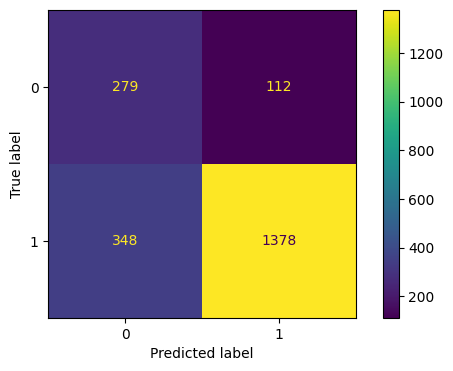

In [ ]:
print("Random Forest MODEL with CountVectorizer")
eval(rf_model, X_train_countVec, X_test_countVec, y_train, y_test)

In [ ]:
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-0': make_scorer(precision_score, average=None, labels=[0]),
            'recall-0': make_scorer(recall_score, average=None, labels = [0]),
            'f1-0': make_scorer(f1_score, average=None, labels = [0])}

In [ ]:
rf_model = RandomForestClassifier(n_estimator, max_depth = 8, n_jobs = -1, class_weight= "balanced", random_state=101)
scores = cross_validate(rf_model, X_train_countVec, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy        0.794320
train_accuracy       0.811025
test_precision-0     0.465126
train_precision-0    0.493535
test_recall-0        0.726572
train_recall-0       0.772098
test_f1-0            0.566841
train_f1-0           0.601904
dtype: float64

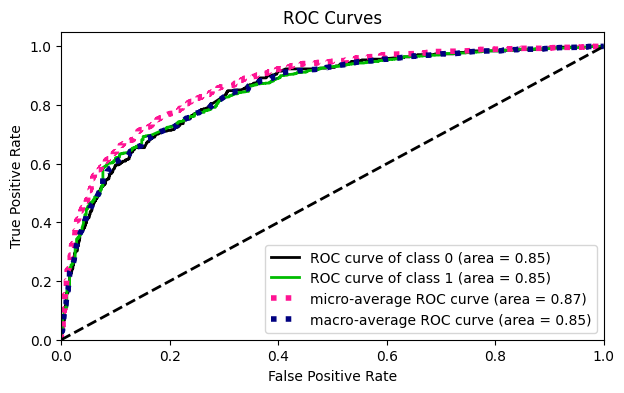

In [ ]:
rf_model = RandomForestClassifier(n_estimator, max_depth = 8, n_jobs = -1, class_weight= "balanced", random_state=101)
rf_model.fit(X_train_countVec,y_train)

y_pred_proba = rf_model.predict_proba(X_test_countVec)

plot_roc(y_test, y_pred_proba)
plt.show();

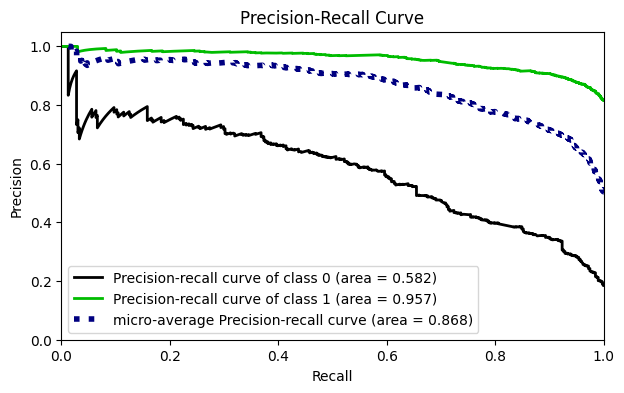

In [ ]:
y_pred_proba = rf_model.predict_proba(X_test_countVec)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = rf_model.predict(X_test_countVec)
y_test_dummies = pd.get_dummies(y_test).values
y_pred_proba = rf_model.predict_proba(X_test_countVec)

rf_countVec_rec_0 = recall_score(y_test, y_pred, labels = [0], average = None)
rf_countVec_f1_0 = f1_score(y_test, y_pred, labels = [0], average = None)
rf_countVec_AP_0 = average_precision_score(y_test_dummies[:, 0], y_pred_proba[:, 0])
rf_countVec_auc_0 = roc_auc_score(y_test_dummies[:, 0], y_pred_proba[:,0])

In [ ]:
print("Random Forest model with the CountVectorizer results:")
print(f"AP: {rf_countVec_AP_0} \nAUC: {rf_countVec_auc_0} \nF1_score: {rf_countVec_f1_0[0]}, \nRecall: {rf_countVec_rec_0[0]}")

Random Forest model with the CountVectorizer results:
AP: 0.5822552091621439 
AUC: 0.8496182945947788 
F1_score: 0.5481335952848723, 
Recall: 0.7135549872122762


In [ ]:
new_model = {
    "Model": "Random Forest with CountVectorizer",
    "F1": rf_countVec_f1_0[0],
    "Recall": rf_countVec_rec_0[0],
    "AP": rf_countVec_AP_0,
    "ROC_AUC": rf_countVec_auc_0
}

csv_file_path = '/content/comapre.csv'

# Load the DataFrame from CSV file
compare = pd.read_csv(csv_file_path)

#append the result
compare = compare.append(new_model, ignore_index=True)

# Save the DataFrame to a CSV file
compare.to_csv(csv_file_path, index=False)
compare

,Model,F1,Recall,AP,ROC_AUC
0,logistic Regression with CountVectorizer,0.736842,0.805627,0.801962,0.942196
1,Logistic Regression with TF-IDF,0.738428,0.877238,0.807804,0.949749
2,Naive Bayes with CountVectorizer,0.359684,0.232737,0.678750,0.901917
3,Naive Bayes with TF-IDF,0.359684,0.232737,0.678750,0.901917
4,SVM with CountVectorizer,0.744705,0.854220,0.986545,0.946696
5,SVM with TF-IDF,0.705036,0.877238,0.985153,0.939422
6,Random Forest with CountVectorizer,0.548134,0.713555,0.582255,0.849618


### TF-IDF

In [ ]:
n_estimator =10

In [ ]:
rf_model = RandomForestClassifier(n_estimator, max_depth = 8, n_jobs = -1, class_weight= "balanced", random_state=101)
rf_model.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=10,
                       n_jobs=-1, random_state=101)

Random Forest MODEL with TF-IDF

Confusion Matrix--------------------------------------------
[[ 261  130]
 [ 314 1412]]

Test_Set Results-------------------------------------------
              precision    recall  f1-score   support

           0       0.45      0.67      0.54       391
           1       0.92      0.82      0.86      1726

    accuracy                           0.79      2117
   macro avg       0.68      0.74      0.70      2117
weighted avg       0.83      0.79      0.80      2117


Train_Set Results -----------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.75      0.60      3522
           1       0.94      0.83      0.88     15527

    accuracy                           0.81     19049
   macro avg       0.72      0.79      0.74     19049
weighted avg       0.85      0.81      0.83     19049



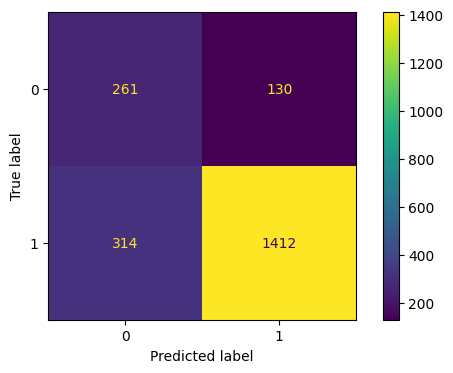

In [ ]:
print("Random Forest MODEL with TF-IDF")
eval(rf_model, X_train_tf_idf, X_test_tf_idf, y_train, y_test)

In [ ]:
rf_model = RandomForestClassifier(n_estimator, max_depth = 8, n_jobs = -1, class_weight= "balanced", random_state=101)
scores = cross_validate(rf_model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy        0.788597
train_accuracy       0.812244
test_precision-0     0.456187
train_precision-0    0.496236
test_recall-0        0.722884
train_recall-0       0.786452
test_f1-0            0.558906
train_f1-0           0.608046
dtype: float64

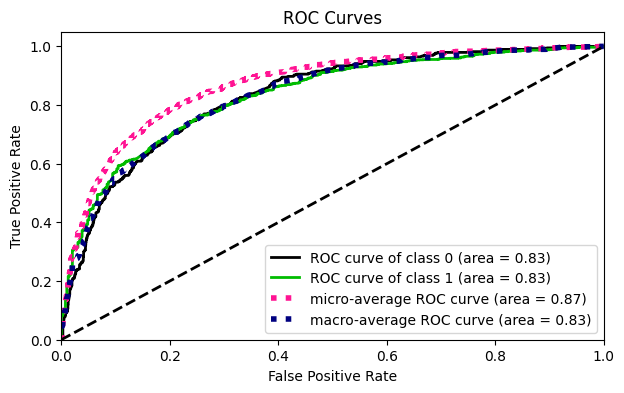

In [ ]:
rf_model = RandomForestClassifier(n_estimator, max_depth = 8, n_jobs = -1, class_weight= "balanced", random_state=101)
rf_model.fit(X_train_tf_idf,y_train)

y_pred_proba = rf_model.predict_proba(X_test_tf_idf)

plot_roc(y_test, y_pred_proba)
plt.show();


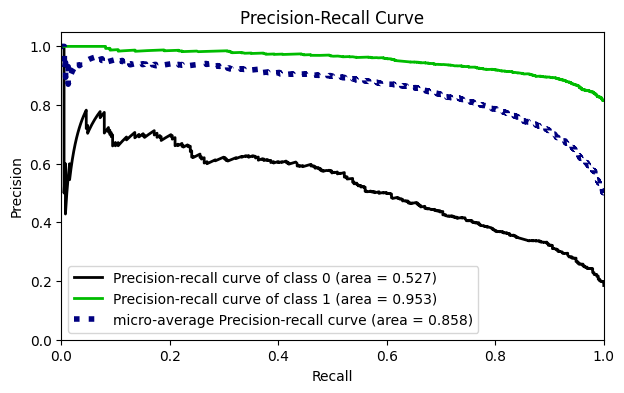

In [ ]:
y_pred_proba = rf_model.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = rf_model.predict(X_test_tf_idf)
y_test_dummies = pd.get_dummies(y_test).values
y_pred_proba = rf_model.predict_proba(X_test_tf_idf)

rf_tf_idf_rec_0 = recall_score(y_test, y_pred, labels = [0], average = None)
rf_tf_idf_f1_0 = f1_score(y_test, y_pred, labels = [0], average = None)
rf_tf_idf_AP_0 = average_precision_score(y_test_dummies[:, 0], y_pred_proba[:, 0])
rf_tf_idf_auc_0 = roc_auc_score(y_test_dummies[:, 0], y_pred_proba[:,0])

In [ ]:
print("Random Forest model with the TF-IDF results:")
print(f"AP: {rf_tf_idf_AP_0} \nAUC: {rf_tf_idf_auc_0} \nF1_score: {rf_tf_idf_f1_0[0]}, \nRecall: {rf_tf_idf_rec_0[0]}")

Random Forest model with the TF-IDF results:
AP: 0.527412011401446 
AUC: 0.8317080724173392 
F1_score: 0.5403726708074535, 
Recall: 0.6675191815856778


In [ ]:
new_model = {
    "Model": "Random Forest with TF-IDF",
    "F1": rf_tf_idf_f1_0[0],
    "Recall": rf_tf_idf_rec_0[0],
    "AP": rf_tf_idf_AP_0,
    "ROC_AUC": rf_tf_idf_auc_0
}

csv_file_path = '/content/comapre.csv'

# Load the DataFrame from CSV file
compare = pd.read_csv(csv_file_path)

#append the result
compare = compare.append(new_model, ignore_index=True)

# Save the DataFrame to a CSV file
compare.to_csv(csv_file_path, index=False)

In [ ]:
compare

,Model,F1,Recall,AP,ROC_AUC
0,logistic Regression with CountVectorizer,0.736842,0.805627,0.801962,0.942196
1,Logistic Regression with TF-IDF,0.738428,0.877238,0.807804,0.949749
2,Naive Bayes with CountVectorizer,0.359684,0.232737,0.678750,0.901917
3,Naive Bayes with TF-IDF,0.359684,0.232737,0.678750,0.901917
4,SVM with CountVectorizer,0.744705,0.854220,0.986545,0.946696
5,SVM with TF-IDF,0.705036,0.877238,0.985153,0.939422
6,Random Forest with CountVectorizer,0.548134,0.713555,0.582255,0.849618
7,Random Forest with TF-IDF,0.540373,0.667519,0.527412,0.831708


## Ada Boosting



### Countvectorizer

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
n_estimator = 100

In [ ]:
ada_model = AdaBoostClassifier(n_estimators = n_estimator, random_state=101)
ada_model.fit(X_train_countVec, y_train)

AdaBoostClassifier(n_estimators=100, random_state=101)

Ada Boost MODEL with CountVectorizer

Confusion Matrix--------------------------------------------
[[ 217  174]
 [  58 1668]]

Test_Set Results-------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.55      0.65       391
           1       0.91      0.97      0.93      1726

    accuracy                           0.89      2117
   macro avg       0.85      0.76      0.79      2117
weighted avg       0.88      0.89      0.88      2117


Train_Set Results -----------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.60      0.67      3522
           1       0.91      0.96      0.94     15527

    accuracy                           0.89     19049
   macro avg       0.84      0.78      0.80     19049
weighted avg       0.89      0.89      0.89     19049



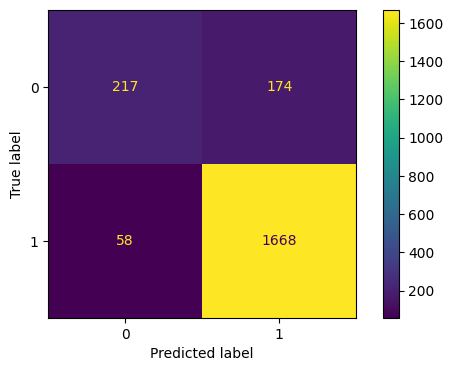

In [ ]:
print("Ada Boost MODEL with CountVectorizer")
eval(ada_model, X_train_countVec, X_test_countVec,y_train, y_test)

In [ ]:
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-0': make_scorer(precision_score, average=None, labels=[0]),
            'recall-0': make_scorer(recall_score, average=None, labels = [0]),
            'f1-0': make_scorer(f1_score, average=None, labels = [0])}

In [ ]:
ada_model = AdaBoostClassifier(n_estimators = n_estimator, random_state=101)
scores = cross_validate(ada_model, X_train_countVec, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy        0.888498
train_accuracy       0.892424
test_precision-0     0.756208
train_precision-0    0.768432
test_recall-0        0.586589
train_recall-0       0.598555
test_f1-0            0.660271
train_f1-0           0.672928
dtype: float64

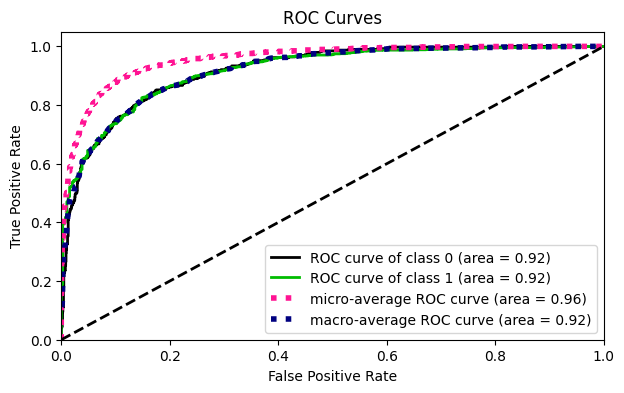

In [ ]:
ada_model = AdaBoostClassifier(n_estimators = n_estimator, random_state=101)
ada_model.fit(X_train_countVec, y_train)
y_pred_proba = ada_model.predict_proba(X_test_countVec)

plot_roc(y_test, y_pred_proba)
plt.show();


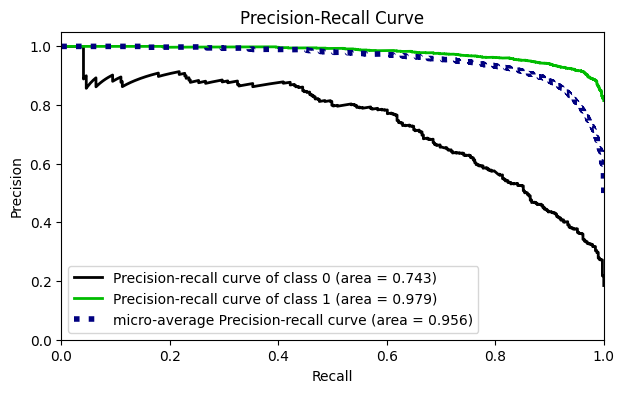

In [ ]:
y_pred_proba = ada_model.predict_proba(X_test_countVec)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = ada_model.predict(X_test_countVec)
y_test_dummies = pd.get_dummies(y_test).values
y_pred_proba = ada_model.predict_proba(X_test_countVec)

ada_countVec_rec_0 = recall_score(y_test, y_pred, labels = [0], average = None)
ada_countVec_f1_0 = f1_score(y_test, y_pred, labels = [0], average = None)
ada_countVec_AP_0 = average_precision_score(y_test_dummies[:, 0], y_pred_proba[:, 0])
ada_countVec_auc_0 = roc_auc_score(y_test_dummies[:, 0], y_pred_proba[:,0])

In [ ]:
print("Ada boost model with the CountVectorizer results:")
print(f"AP: {ada_countVec_AP_0} \nAUC: {ada_countVec_auc_0} \nF1_score: {ada_countVec_f1_0[0]}, \nRecall: {ada_countVec_rec_0[0]}")

Ada boost model with the CountVectorizer results:
AP: 0.743270472005436 
AUC: 0.9173376640696079 
F1_score: 0.6516516516516515, 
Recall: 0.5549872122762148


In [ ]:
new_model = {
    "Model": "Ada boost with CountVectorizer",
    "F1": ada_countVec_f1_0[0],
    "Recall": ada_countVec_rec_0[0],
    "AP": ada_countVec_AP_0,
    "ROC_AUC": ada_countVec_auc_0
}

csv_file_path = '/content/comapre.csv'

# Load the DataFrame from CSV file
compare = pd.read_csv(csv_file_path)

#append the result
compare = compare.append(new_model, ignore_index=True)

# Save the DataFrame to a CSV file
compare.to_csv(csv_file_path, index=False)

In [ ]:
compare

,Model,F1,Recall,AP,ROC_AUC
0,logistic Regression with CountVectorizer,0.736842,0.805627,0.801962,0.942196
1,Logistic Regression with TF-IDF,0.738428,0.877238,0.807804,0.949749
2,Naive Bayes with CountVectorizer,0.359684,0.232737,0.678750,0.901917
3,Naive Bayes with TF-IDF,0.359684,0.232737,0.678750,0.901917
4,SVM with CountVectorizer,0.744705,0.854220,0.986545,0.946696
5,SVM with TF-IDF,0.705036,0.877238,0.985153,0.939422
6,Random Forest with CountVectorizer,0.548134,0.713555,0.582255,0.849618
7,Random Forest with TF-IDF,0.540373,0.667519,0.527412,0.831708
8,Ada boost with CountVectorizer,0.651652,0.554987,0.743270,0.917338


### TF-IDF

In [ ]:
ada_model = AdaBoostClassifier(n_estimators = n_estimator, random_state=101)
ada_model.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=100, random_state=101)

Ada Boost MODEL with TF-IDF

Confusion Matrix--------------------------------------------
[[ 205  186]
 [  54 1672]]

Test_Set Results-------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.52      0.63       391
           1       0.90      0.97      0.93      1726

    accuracy                           0.89      2117
   macro avg       0.85      0.75      0.78      2117
weighted avg       0.88      0.89      0.88      2117


Train_Set Results -----------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.62      0.69      3522
           1       0.92      0.96      0.94     15527

    accuracy                           0.90     19049
   macro avg       0.84      0.79      0.81     19049
weighted avg       0.89      0.90      0.89     19049



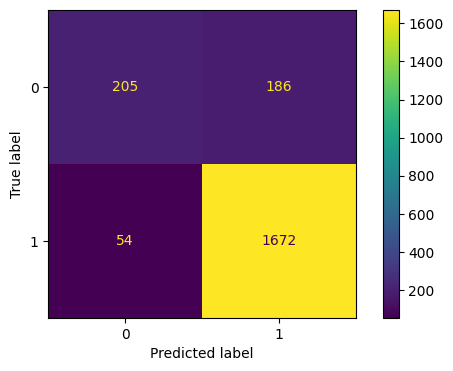

In [ ]:
print("Ada Boost MODEL with TF-IDF")
eval(ada_model, X_train_tf_idf, X_test_tf_idf,y_train,  y_test)

In [ ]:
ada_model = AdaBoostClassifier(n_estimators = n_estimator, random_state=101)
scores = cross_validate(ada_model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy        0.886398
train_accuracy       0.896647
test_precision-0     0.742421
train_precision-0    0.775469
test_recall-0        0.590834
train_recall-0       0.620734
test_f1-0            0.657488
train_f1-0           0.689516
dtype: float64

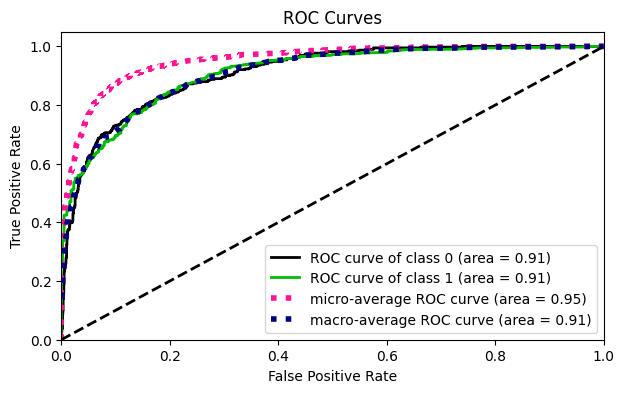

In [ ]:
ada_model = AdaBoostClassifier(n_estimators = n_estimator, random_state=101)
ada_model.fit(X_train_tf_idf, y_train)
y_pred_proba = ada_model.predict_proba(X_test_tf_idf)
plot_roc(y_test, y_pred_proba)
plt.show();

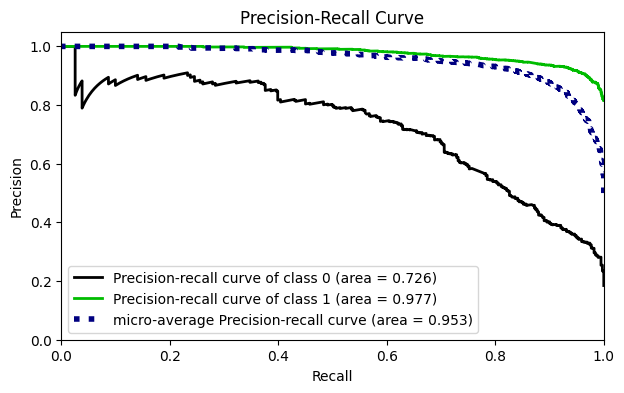

In [ ]:
y_pred_proba = ada_model.predict_proba(X_test_tf_idf)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = ada_model.predict(X_test_tf_idf)
y_test_dummies = pd.get_dummies(y_test).values
y_pred_proba = ada_model.predict_proba(X_test_tf_idf)

ada_tf_idf_rec_0 = recall_score(y_test, y_pred, labels = [0], average = None)
ada_tf_idf_f1_0 = f1_score(y_test, y_pred, labels = [0], average = None)
ada_tf_idf_AP_0 = average_precision_score(y_test_dummies[:, 0], y_pred_proba[:, 0])
ada_tf_idf_auc_0 = roc_auc_score(y_test_dummies[:, 0], y_pred_proba[:,0])

In [ ]:
print("Ada boost model with the TF-IDF results:")
print(f"AP: {ada_tf_idf_AP_0} \nAUC: {ada_tf_idf_auc_0} \nF1_score: {ada_tf_idf_f1_0[0]}, \nRecall: {ada_tf_idf_rec_0[0]}")

Ada boost model with the TF-IDF results:
AP: 0.7258579948243866 
AUC: 0.9095568601766869 
F1_score: 0.6307692307692307, 
Recall: 0.5242966751918159


In [ ]:
new_model = {
    "Model": "Ada boost with TF-IDF",
    "F1": ada_tf_idf_f1_0[0],
    "Recall": ada_tf_idf_rec_0[0],
    "AP": ada_tf_idf_AP_0,
    "ROC_AUC": ada_tf_idf_auc_0
}

csv_file_path = '/content/comapre.csv'

# Load the DataFrame from CSV file
compare = pd.read_csv(csv_file_path)

#append the result
compare = compare.append(new_model, ignore_index=True)

# Save the DataFrame to a CSV file
compare.to_csv(csv_file_path, index=False)

In [ ]:
compare

,Model,F1,Recall,AP,ROC_AUC
0,logistic Regression with CountVectorizer,0.736842,0.805627,0.801962,0.942196
1,Logistic Regression with TF-IDF,0.738428,0.877238,0.807804,0.949749
2,Naive Bayes with CountVectorizer,0.359684,0.232737,0.678750,0.901917
3,Naive Bayes with TF-IDF,0.359684,0.232737,0.678750,0.901917
4,SVM with CountVectorizer,0.744705,0.854220,0.986545,0.946696
5,SVM with TF-IDF,0.705036,0.877238,0.985153,0.939422
6,Random Forest with CountVectorizer,0.548134,0.713555,0.582255,0.849618
7,Random Forest with TF-IDF,0.540373,0.667519,0.527412,0.831708
8,Ada boost with CountVectorizer,0.651652,0.554987,0.743270,0.917338
9,Ada boost with TF-IDF,0.630769,0.524297,0.725858,0.909557


## DL modeling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import BatchNormalization

pd.set_option('display.max_colwidth', None)

In [ ]:
X

array(['absolutely wonderful silky sexy comfortable',
       'love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite',
       'high hope dress really wanted work initially ordered petite small usual size found small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c',
       ...,
       'happy snag dress great price easy slip flattering cut color combo',
       'fit well top see never would worked im glad able try store didnt order online different fabric would great',
       'dress lovely feminine fit perfectly easy wear comfy highly recommend'],
      dtype=object)

### Tokenization

In [ ]:
num_words = 15001
tokenizer = Tokenizer(num_words=num_words)

In [ ]:
tokenizer.fit_on_texts(X)

### Creating word index

In [ ]:
tokenizer.word_index

{'dress': 1,
 'fit': 2,
 'not': 3,
 'size': 4,
 'love': 5,
 'top': 6,
 'color': 7,
 'like': 8,
 'look': 9,
 'wear': 10,
 'great': 11,
 'im': 12,
 'would': 13,
 'fabric': 14,
 'small': 15,
 'perfect': 16,
 'really': 17,
 'little': 18,
 'ordered': 19,
 'one': 20,
 'flattering': 21,
 'soft': 22,
 'well': 23,
 'comfortable': 24,
 'back': 25,
 'bought': 26,
 'nice': 27,
 'cute': 28,
 'beautiful': 29,
 'bit': 30,
 'material': 31,
 'shirt': 32,
 'sweater': 33,
 'large': 34,
 'jean': 35,
 'much': 36,
 'length': 37,
 'run': 38,
 'also': 39,
 'work': 40,
 'got': 41,
 'petite': 42,
 'long': 43,
 'short': 44,
 'waist': 45,
 'skirt': 46,
 'quality': 47,
 'medium': 48,
 'retailer': 49,
 'think': 50,
 'even': 51,
 'pretty': 52,
 'make': 53,
 'feel': 54,
 'x': 55,
 'pant': 56,
 'store': 57,
 'tried': 58,
 'usually': 59,
 'get': 60,
 'sleeve': 61,
 'way': 62,
 'good': 63,
 'go': 64,
 'could': 65,
 'cut': 66,
 'dont': 67,
 'big': 68,
 'black': 69,
 'made': 70,
 'still': 71,
 'right': 72,
 'true': 73,
 '

In [ ]:
len(tokenizer.word_index)

5318

### Converting tokens to numeric

In [ ]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [ ]:
X[:2]

array(['absolutely wonderful silky sexy comfortable',
       'love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite'],
      dtype=object)

In [ ]:
X_num_tokens[:2]

[[173, 394, 728, 493, 24],
 [5,
  1,
  1368,
  52,
  1059,
  150,
  57,
  12,
  216,
  1034,
  318,
  13,
  19,
  77,
  1034,
  42,
  26,
  42,
  5,
  37,
  166,
  18,
  208,
  13,
  94,
  73,
  1094,
  354,
  603,
  42]]

In [ ]:
np.array(X_num_tokens)

array([list([173, 394, 728, 493, 24]),
       list([5, 1, 1368, 52, 1059, 150, 57, 12, 216, 1034, 318, 13, 19, 77, 1034, 42, 26, 42, 5, 37, 166, 18, 208, 13, 94, 73, 1094, 354, 603, 42]),
       list([134, 388, 1, 17, 142, 40, 911, 19, 42, 15, 165, 4, 153, 15, 15, 498, 65, 3, 578, 1817, 42, 48, 174, 6, 541, 24, 2, 178, 95, 541, 91, 294, 395, 556, 368, 3682, 294, 1521, 1594, 82, 702, 3682, 294, 680, 2621, 339, 783]),
       ..., list([189, 678, 1, 11, 102, 184, 281, 21, 66, 7, 864]),
       list([2, 23, 6, 79, 318, 13, 438, 12, 216, 313, 117, 57, 76, 172, 77, 171, 14, 13, 11]),
       list([1, 132, 277, 2, 84, 184, 10, 164, 304, 140])], dtype=object)

In [ ]:
X[200]

'tunic seen season style delicate open around upper chest gave quite feminine appeal especially love weight fabric light side wont worry hot flash like wearing thicker fabric warm without bulky top sale able grab two color tunic also age appropriate flattering anyone extraordinary say least'

In [ ]:
print(X_num_tokens[200])

[288, 633, 337, 75, 404, 384, 125, 540, 146, 524, 181, 277, 1551, 253, 5, 161, 14, 129, 105, 452, 876, 378, 3209, 8, 80, 575, 14, 205, 139, 521, 6, 88, 313, 1076, 183, 7, 288, 39, 1052, 560, 21, 621, 4057, 163, 401]


In [ ]:
tokenizer.word_index["style"]

75

### Maximum number of tokens for all documents¶

In [ ]:
len(X_num_tokens[150])
# The 150th user query consists of 15 tokens.

13

In [ ]:
num_tokens = [len(sen_tokens) for sen_tokens in X_num_tokens]
num_tokens = np.array(num_tokens)
num_tokens


array([ 5, 30, 47, ..., 11, 19, 10])

In [ ]:
num_tokens.mean()

28.32353774922045

In [ ]:
num_tokens.max()

59

In [ ]:
num_tokens.argmax()

11187

In [ ]:
X[16258]

'floral print color pretty summer tempting layer seamless tank wear'

In [ ]:
len(X[16258])

66

In [ ]:
num_tokens.argmin()

15857

In [ ]:
X[820]

'received skirt today disappointed dont know expected not thought even though quality good fit true size may return fabric skirt busy least uncertain even though many top color not matching white look better colored top particular print going try one time make definite decision'

In [ ]:
len(X[820])

277

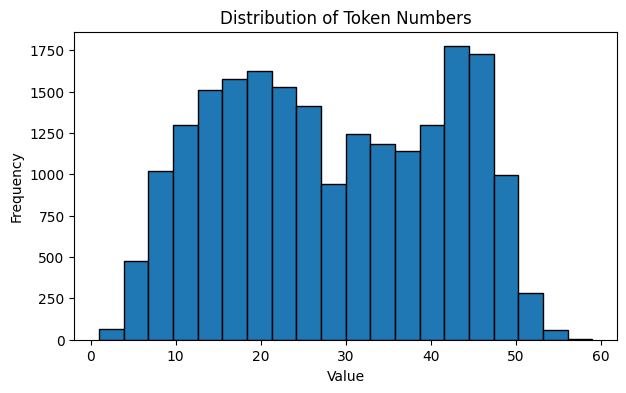

In [ ]:
# Plot a histogram to visualize the distribution
plt.hist(num_tokens, bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.title("Distribution of Token Numbers")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
max_tokens = 59

In [ ]:
sum(num_tokens <= max_tokens) / len(num_tokens)

1.0

In [ ]:
sum(num_tokens <= max_tokens)

21166

In [ ]:
len(num_tokens)

21166

### Fixing token counts of all documents (pad_sequences)

In [ ]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens, padding="pre")

In [ ]:
X_pad.shape

(21166, 59)

In [ ]:
len(X_num_tokens[80])

47

In [ ]:
X_pad[80]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,   17,  373,    8,    3,    9,   62,   92,  401,    3,  279,
         36, 2749,  579,   20,  137,    9,    8, 1487,   25,   59,   10,
         48,   34,   41,   48,  122,   31,   95,  541,  137,  214,   70,
          9,  449,    3,   21,   31,   27, 1017,  147,  404,   26, 1783,
        528,  927,  104,    7], dtype=int32)

### Train Set Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=101)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, stratify=y_train, random_state=101)

### Modeling

In [ ]:
tf.random.set_seed(101)
dl_model = Sequential()

In [ ]:
embedding_size = 100

In [ ]:
dl_model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens,
                    name='embedding_layer'))

In [ ]:
dl_model.add(GRU(units=50, return_sequences=True))
dl_model.add(BatchNormalization())
dl_model.add(Dropout(0.2))

dl_model.add(GRU(units=25, return_sequences=True))
dl_model.add(BatchNormalization())
dl_model.add(Dropout(0.2))

dl_model.add(GRU(units=12, return_sequences=False))
dl_model.add(BatchNormalization())
dl_model.add(Dropout(0.2))

dl_model.add(Dense(1, activation='sigmoid'))

In [ ]:
optimizer = Adam(learning_rate=0.001)
dl_model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

In [ ]:
dl_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding)  (None, 59, 100)          1500100   
                                                                 
 gru_4 (GRU)                 (None, 59, 50)            22800     
                                                                 
 gru_5 (GRU)                 (None, 59, 50)            15300     
                                                                 
 batch_normalization (BatchN  (None, 59, 50)           200       
 ormalization)                                                   
                                                                 
 dropout_2 (Dropout)         (None, 59, 50)            0         
                                                                 
 gru_6 (GRU)                 (None, 59, 25)            5775      
                                                      

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_recall", mode="max",
                           verbose=1, patience = 15, restore_best_weights=True)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
C_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: C_weights[0], 1: C_weights[1]}

In [ ]:
dl_model.fit(X_train, y_train, epochs=30, batch_size=256, class_weight=class_weights,
         validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/30
67/67 [==============================] - 25s 196ms/step - loss: 0.5031 - recall: 0.6735 - val_loss: 0.5063 - val_recall: 1.0000
Epoch 2/30
67/67 [==============================] - 11s 168ms/step - loss: 0.3055 - recall: 0.8535 - val_loss: 0.4111 - val_recall: 1.0000
Epoch 3/30
67/67 [==============================] - 11s 168ms/step - loss: 0.2310 - recall: 0.9064 - val_loss: 0.3556 - val_recall: 0.9981
Epoch 4/30
67/67 [==============================] - 11s 168ms/step - loss: 0.1736 - recall: 0.9313 - val_loss: 0.3014 - val_recall: 0.9839
Epoch 5/30
67/67 [==============================] - 11s 170ms/step - loss: 0.1263 - recall: 0.9528 - val_loss: 0.2893 - val_recall: 0.9401
Epoch 6/30
67/67 [==============================] - 11s 169ms/step - loss: 0.0952 - recall: 0.9662 - val_loss: 0.3683 - val_recall: 0.9028
Epoch 7/30
67/67 [==============================] - 11s 168ms/step - loss: 0.0774 - recall: 0.9743 - val_loss: 0.5075 - val_recall: 0.8674
Epoch 8/30
67/67 [=========

In [ ]:
dl_model.save('NLP_Sentiment_Analysis.h5')

### Model Evaluation

In [ ]:
from tensorflow.keras.models import load_model
dl_model = load_model('NLP_Sentiment_Analysis.h5')

In [ ]:
model_loss = pd.DataFrame(dl_model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.503138,0.673465,0.506333,1.000000
1,0.305491,0.853514,0.411148,1.000000
2,0.230952,0.906398,0.355572,0.998068
3,0.173551,0.931301,0.301376,0.983902
4,0.126286,0.952769,0.289327,0.940116


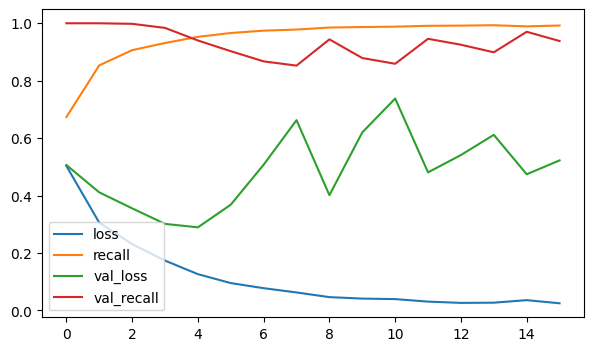

In [ ]:
model_loss.plot();

In [ ]:
dl_model.evaluate(X_test, y_test)

67/67 [==============================] - 1s 22ms/step - loss: 0.5074 - recall: 1.0000


[0.5073912143707275, 1.0]

In [ ]:
dl_model.evaluate(X_train, y_train)

536/536 [==============================] - 12s 22ms/step - loss: 0.5028 - recall: 1.0000


[0.5027748346328735, 1.0]

In [ ]:
y_pred = (dl_model.predict(X_test) >= 0.5).astype("int32")

67/67 [==============================] - 3s 22ms/step


In [ ]:
y_train_pred = (dl_model.predict(X_train) >= 0.5).astype("int32")

536/536 [==============================] - 9s 17ms/step


In [ ]:
print("Test Result--------------------------------------------")
print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))


Test Result--------------------------------------------
[[   0  391]
 [   0 1726]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       391
           1       0.82      1.00      0.90      1726

    accuracy                           0.82      2117
   macro avg       0.41      0.50      0.45      2117
weighted avg       0.66      0.82      0.73      2117



In [ ]:
y_train_pred = (dl_model.predict(X_train) >= 0.5).astype("int32")

print("Train Result--------------------------------------------")
print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

536/536 [==============================] - 9s 16ms/step
Train Result--------------------------------------------
[[    0  3170]
 [    0 13974]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3170
           1       0.82      1.00      0.90     13974

    accuracy                           0.82     17144
   macro avg       0.41      0.50      0.45     17144
weighted avg       0.66      0.82      0.73     17144



67/67 [==============================] - 1s 17ms/step


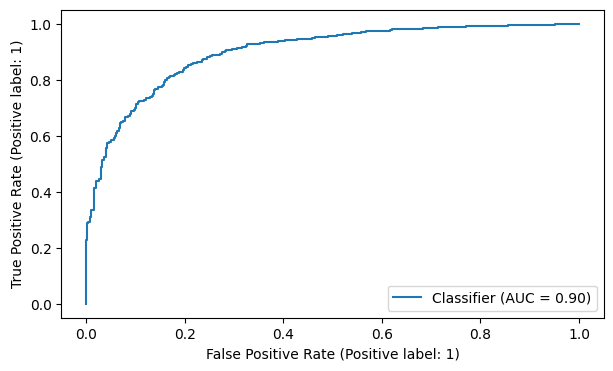

In [ ]:
y_pred_proba = dl_model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

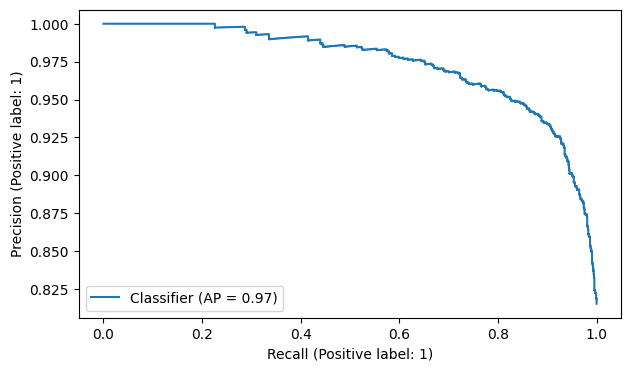

In [ ]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

In [ ]:
dl_model_auc_0 = roc_auc_score(y_test, y_pred_proba)
dl_model_AP_0 = average_precision_score(y_test, y_pred_proba)
dl_model_f1_0 = f1_score(y_test, y_pred)
dl_model_rec_0 = recall_score(y_test, y_pred)

In [ ]:
print("Deep learning model results:")
print(f"AP: {dl_model_AP_0} \nAUC: {dl_model_auc_0} \nF1_score: {dl_model_f1_0}, \nRecall: {dl_model_rec_0}")

Deep learning model results:
AP: 0.9736676223376739 
AUC: 0.8991192325587598 
F1_score: 0.898256570387718, 
Recall: 1.0


In [ ]:
new_model = {
    "Model": "Deep learning model",
    "F1": dl_model_f1_0,
    "Recall": dl_model_rec_0,
    "AP": dl_model_AP_0,
    "ROC_AUC": dl_model_auc_0
}

csv_file_path = '/content/comapre.csv'

# Load the DataFrame from CSV file
compare = pd.read_csv(csv_file_path)

#append the result
compare = compare.append(new_model, ignore_index=True)

# Save the DataFrame to a CSV file
compare.to_csv(csv_file_path, index=False)

In [ ]:
compare

,Model,F1,Recall,AP,ROC_AUC
0,logistic Regression with CountVectorizer,0.736842,0.805627,0.801962,0.942196
1,Logistic Regression with TF-IDF,0.738428,0.877238,0.807804,0.949749
2,Naive Bayes with CountVectorizer,0.359684,0.232737,0.678750,0.901917
3,Naive Bayes with TF-IDF,0.359684,0.232737,0.678750,0.901917
4,SVM with CountVectorizer,0.744705,0.854220,0.986545,0.946696
5,SVM with TF-IDF,0.705036,0.877238,0.985153,0.939422
6,Random Forest with CountVectorizer,0.548134,0.713555,0.582255,0.849618
7,Random Forest with TF-IDF,0.540373,0.667519,0.527412,0.831708
8,Ada boost with CountVectorizer,0.651652,0.554987,0.743270,0.917338
9,Ada boost with TF-IDF,0.630769,0.524297,0.725858,0.909557


## BERT Modeling

### Import libraries

In [ ]:
!pip install transformers
#To use BERT models, we first need to install transformers as BERT models are built on top of transformers.

### Tokenization

In [ ]:
X

array(['absolutely wonderful silky sexy comfortable',
       'love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite',
       'high hope dress really wanted work initially ordered petite small usual size found small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c',
       ...,
       'happy snag dress great price easy slip flattering cut color combo',
       'fit well top see never would worked im glad able try store didnt order online different fabric would great',
       'dress lovely feminine fit perfectly easy wear comfy highly recommend'],
      dtype=object)

In [ ]:
from transformers import BertTokenizer

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
tokenizer.vocab

OrderedDict([('[PAD]', 0),
             ('[unused0]', 1),
             ('[unused1]', 2),
             ('[unused2]', 3),
             ('[unused3]', 4),
             ('[unused4]', 5),
             ('[unused5]', 6),
             ('[unused6]', 7),
             ('[unused7]', 8),
             ('[unused8]', 9),
             ('[unused9]', 10),
             ('[unused10]', 11),
             ('[unused11]', 12),
             ('[unused12]', 13),
             ('[unused13]', 14),
             ('[unused14]', 15),
             ('[unused15]', 16),
             ('[unused16]', 17),
             ('[unused17]', 18),
             ('[unused18]', 19),
             ('[unused19]', 20),
             ('[unused20]', 21),
             ('[unused21]', 22),
             ('[unused22]', 23),
             ('[unused23]', 24),
             ('[unused24]', 25),
             ('[unused25]', 26),
             ('[unused26]', 27),
             ('[unused27]', 28),
             ('[unused28]', 29),
             ('[unused29]', 30),
  

In [ ]:
print(len(tokenizer.vocab))

30522


### Fixing token counts of all documents

In [ ]:
# For every sentence...
number_tokens_sentences = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.

    input_ids = tokenizer.encode(sent,
                                 add_special_tokens=True)
    number_tokens_sentences.append(len(input_ids))

print('Max sentence length: ', max(number_tokens_sentences))

Max sentence length:  68


In [ ]:
np.array(number_tokens_sentences).mean()

32.90324104696211

In [ ]:
token_size = 70
sum(np.array(number_tokens_sentences) < token_size) / len(number_tokens_sentences)

1.0

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.1, stratify=y, random_state=101)

X_train2, X_val2, y_train2, y_val2 = train_test_split(  X_train2, y_train2, test_size=0.1, stratify=y_train2, random_state=101)

### Transformation Vectors to Matrices

In [ ]:
def transformation(X):
  # set array dimensions
  seq_len = 70

  all_sentence_tokens = tokenizer(list(X),
                                  max_length=seq_len,
                                  truncation=True,
                                  padding='max_length',
                                  add_special_tokens=True)

  return np.array(all_sentence_tokens['input_ids']), np.array(all_sentence_tokens['attention_mask'])

In [ ]:
Xids_train, Xmask_train = transformation(X_train2)
# We are creating 2 separate matrices for our training set.

Xids_val, Xmask_val = transformation(X_val2)
# We are creating 2 separate matrices for our validation set.

Xids_test, Xmask_test = transformation(X_test2)
# We are creating 2 separate matrices for our test set.

In [ ]:
Xids_train

array([[  101,  2673, 18149, ...,     0,     0,     0],
       [  101,  4206, 11519, ...,     0,     0,     0],
       [  101,  4149,  5156, ...,     0,     0,     0],
       ...,
       [  101,  4156,  3744, ...,     0,     0,     0],
       [  101, 10047,  5580, ...,     0,     0,     0],
       [  101,  2246,  2498, ...,     0,     0,     0]])

In [ ]:
Xids_val

array([[  101, 28407,  6625, ...,     0,     0,     0],
       [  101,  3191,  3319, ...,     0,     0,     0],
       [  101,  3835, 14329, ...,     0,     0,     0],
       ...,
       [  101,  3866,  9880, ...,     0,     0,     0],
       [  101,  2307,  2424, ...,     0,     0,     0],
       [  101,  4377,  2307, ...,     0,     0,     0]])

In [ ]:
Xids_test

array([[  101,  2293,  2327, ...,     0,     0,     0],
       [  101,  3376,  9764, ...,     0,     0,     0],
       [  101,  2292,  2227, ...,     0,     0,     0],
       ...,
       [  101,  2293,  2327, ...,     0,     0,     0],
       [  101,  3167,  5448, ...,     0,     0,     0],
       [  101,  4310, 12138, ...,     0,     0,     0]])

In [ ]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)

print("Xids_val.shape   :", Xids_val.shape)
print("Xmask_val.shape  :", Xmask_val.shape)

print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (17144, 70)
Xmask_train.shape : (17144, 70)
Xids_val.shape   : (1905, 70)
Xmask_val.shape  : (1905, 70)
Xids_test.shape   : (2117, 70)
Xmask_test.shape  : (2117, 70)


In [ ]:
labels_train = y_train2.reshape(-1,1)
labels_train

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [ ]:
labels_val = y_val2.reshape(-1,1)
labels_val

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
labels_test = y_test2.reshape(-1,1)
labels_test

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

### Transformation Matrix to Tensorflow tensor

In [ ]:
import tensorflow as tf

In [ ]:
dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, labels_train))
dataset_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(70,), dtype=tf.int64, name=None), TensorSpec(shape=(70,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
dataset_val = tf.data.Dataset.from_tensor_slices((Xids_val, Xmask_val, labels_val))
dataset_val

<_TensorSliceDataset element_spec=(TensorSpec(shape=(70,), dtype=tf.int64, name=None), TensorSpec(shape=(70,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, labels_test))
dataset_test

<_TensorSliceDataset element_spec=(TensorSpec(shape=(70,), dtype=tf.int64, name=None), TensorSpec(shape=(70,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [ ]:
dataset_train = dataset_train.map(map_func)
dataset_val = dataset_val.map(map_func)
dataset_test = dataset_test.map(map_func)

In [ ]:
dataset_train

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(70,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(70,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
dataset_val

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(70,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(70,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
dataset_test

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(70,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(70,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Batch Size

In [ ]:
batch_size = 16

In [ ]:
train_ds = dataset_train.batch(batch_size)
val_ds = dataset_val.batch(batch_size)
test_ds = dataset_test.batch(batch_size)

In [ ]:
!pip install -q tf-models-official

In [ ]:
len(X_train)

19049

In [ ]:
len(X_train)/16

1190.5625

In [ ]:
print(len(train_ds))
print(len(train_ds)*3)
print(int(0.1*len(train_ds)*3))

1072
3216
321


### Creating optimization

In [ ]:
from official.nlp import optimization

In [ ]:
epochs = 3
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

### Creating Model with TPU

In [ ]:
def create_model():
    from transformers import TFBertModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFBertModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(70,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(70,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = Dense(256, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name="dropout")(x)
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)

In [ ]:
tf.keras.backend.clear_session()


In [ ]:
with strategy.scope():
  loss = tf.keras.losses.BinaryCrossentropy()
  recall = tf.keras.metrics.Recall()
  Bert_model = create_model()
  Bert_model.compile(optimizer=optimizer, loss=loss, metrics=[recall])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
Bert_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 70)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 70)]         0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 70,                                          

### Model Fiting

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
C_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: C_weights[0], 1: C_weights[1]}

In [ ]:
class_weights

{0: 2.7042873367404883, 1: 0.6134153410188704}

In [ ]:
Bert_model.fit(train_ds, validation_data= val_ds, epochs=epochs, class_weight=class_weights)

Epoch 1/3
1072/1072 [==============================] - 83s 77ms/step - loss: 0.4419 - recall_1: 0.9782 - val_loss: 0.4615 - val_recall_1: 0.9652
Epoch 2/3
1072/1072 [==============================] - 83s 77ms/step - loss: 0.4407 - recall_1: 0.9761 - val_loss: 0.4637 - val_recall_1: 0.9646
Epoch 3/3
1072/1072 [==============================] - 82s 76ms/step - loss: 0.4435 - recall_1: 0.9771 - val_loss: 0.4688 - val_recall_1: 0.9646


In [ ]:
Bert_model.save('BERT_Sentiment_Analysis.h5')

### Model evaluation

In [ ]:
from tensorflow.keras.models import load_model
Bert_model = load_model('BERT_Sentiment_Analysis.h5')

In [ ]:
model_loss = pd.DataFrame(Bert_model.history.history)

In [ ]:
model_loss.head()

,loss,recall_1,val_loss,val_recall_1
0,0.441875,0.978245,0.461545,0.965229
1,0.440737,0.976098,0.463716,0.964585
2,0.443517,0.977100,0.468796,0.964585


<Axes: >

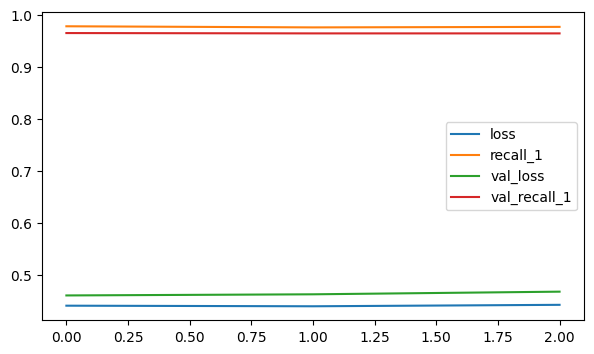

In [ ]:
model_loss.plot()

In [ ]:
Bert_model.evaluate(train_ds)

1072/1072 [==============================] - 29s 26ms/step - loss: 0.2902 - recall_1: 0.9799


[0.2901787757873535, 0.9798912405967712]

In [ ]:
Bert_model.evaluate(test_ds)

133/133 [==============================] - 4s 22ms/step - loss: 0.4391 - recall_1: 0.9658


[0.43913739919662476, 0.9658169150352478]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

print("Test Result:------------------------------------------------------")
y_pred = Bert_model.predict(test_ds) >= 0.5
print(confusion_matrix(y_test2, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test2, y_pred))

Test Result:------------------------------------------------------
133/133 [==============================] - 13s 47ms/step
[[ 280  111]
 [  59 1667]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.72      0.77       391
           1       0.94      0.97      0.95      1726

    accuracy                           0.92      2117
   macro avg       0.88      0.84      0.86      2117
weighted avg       0.92      0.92      0.92      2117



In [ ]:
print("Train Result:------------------------------------------------------")
y_train_pred = Bert_model.predict(train_ds) >= 0.5
print(confusion_matrix(y_train2, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train2, y_train_pred))

Train Result:------------------------------------------------------
1072/1072 [==============================] - 19s 16ms/step
[[ 2648   522]
 [  281 13693]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      3170
           1       0.96      0.98      0.97     13974

    accuracy                           0.95     17144
   macro avg       0.93      0.91      0.92     17144
weighted avg       0.95      0.95      0.95     17144



133/133 [==============================] - 3s 16ms/step


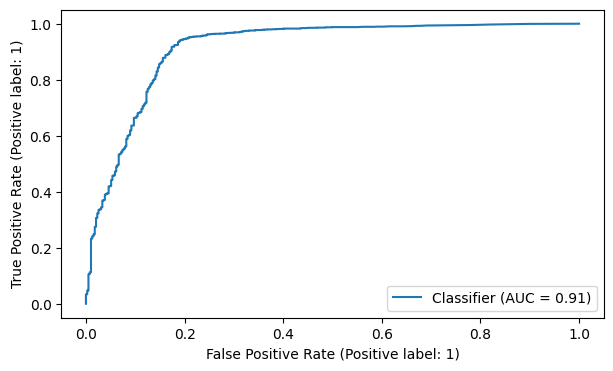

In [ ]:
y_pred_proba = Bert_model.predict(test_ds)
RocCurveDisplay.from_predictions(y_test2, y_pred_proba)

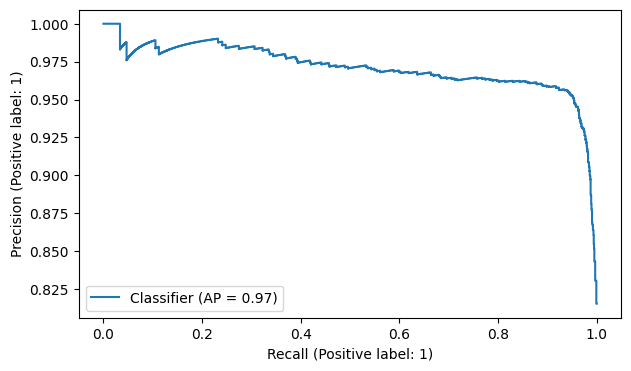

In [ ]:
PrecisionRecallDisplay.from_predictions(y_test2, y_pred_proba)

In [ ]:
bert_model_auc_0 = roc_auc_score(y_test2, y_pred_proba)
bert_model_AP_0 = average_precision_score(y_test2, y_pred_proba)
bert_model_f1_0 = f1_score(y_test2, y_pred)
bert_model_rec_0 = recall_score(y_test2, y_pred)


print("Bert model results:")
print(f"AP: {bert_model_AP_0} \nAUC: {bert_model_auc_0} \nF1_score: {bert_model_f1_0}, \nRecall: {bert_model_rec_0}")

Bert model results:
AP: 0.9711671234413345 
AUC: 0.9136650831424313 
F1_score: 0.9514840182648402, 
Recall: 0.9658169177288528


In [ ]:
new_model = {
    "Model": "BERT model",
    "F1": bert_model_f1_0,
    "Recall": bert_model_rec_0,
    "AP": bert_model_AP_0,
    "ROC_AUC": bert_model_auc_0
}

csv_file_path = '/content/comapre.csv'

# Load the DataFrame from CSV file
compare = pd.read_csv(csv_file_path)

#append the result
compare = compare.append(new_model, ignore_index=True)

# Save the DataFrame to a CSV file
compare.to_csv(csv_file_path, index=False)
compare

,Model,F1,Recall,AP,ROC_AUC
0,logistic Regression with CountVectorizer,0.736842,0.805627,0.801962,0.942196
1,Logistic Regression with TF-IDF,0.738428,0.877238,0.807804,0.949749
2,Naive Bayes with CountVectorizer,0.359684,0.232737,0.678750,0.901917
3,Naive Bayes with TF-IDF,0.359684,0.232737,0.678750,0.901917
4,SVM with CountVectorizer,0.744705,0.854220,0.986545,0.946696
5,SVM with TF-IDF,0.705036,0.877238,0.985153,0.939422
6,Random Forest with CountVectorizer,0.548134,0.713555,0.582255,0.849618
7,Random Forest with TF-IDF,0.540373,0.667519,0.527412,0.831708
8,Ada boost with CountVectorizer,0.651652,0.554987,0.743270,0.917338
9,Ada boost with TF-IDF,0.630769,0.524297,0.725858,0.909557


## Compare Models F1 Scores, Recall Scores and Average Precision Score

In [ ]:
csv_file_path = '/content/comapre.csv'

# Load the DataFrame from CSV file
compare = pd.read_csv(csv_file_path)
compare

,Model,F1,Recall,AP,ROC_AUC
0,logistic Regression with CountVectorizer,0.736842,0.805627,0.801962,0.942196
1,Logistic Regression with TF-IDF,0.738428,0.877238,0.807804,0.949749
2,Naive Bayes with CountVectorizer,0.359684,0.232737,0.678750,0.901917
3,Naive Bayes with TF-IDF,0.359684,0.232737,0.678750,0.901917
4,SVM with CountVectorizer,0.744705,0.854220,0.986545,0.946696
5,SVM with TF-IDF,0.705036,0.877238,0.985153,0.939422
6,Random Forest with CountVectorizer,0.548134,0.713555,0.582255,0.849618
7,Random Forest with TF-IDF,0.540373,0.667519,0.527412,0.831708
8,Ada boost with CountVectorizer,0.651652,0.554987,0.743270,0.917338
9,Ada boost with TF-IDF,0.630769,0.524297,0.725858,0.909557


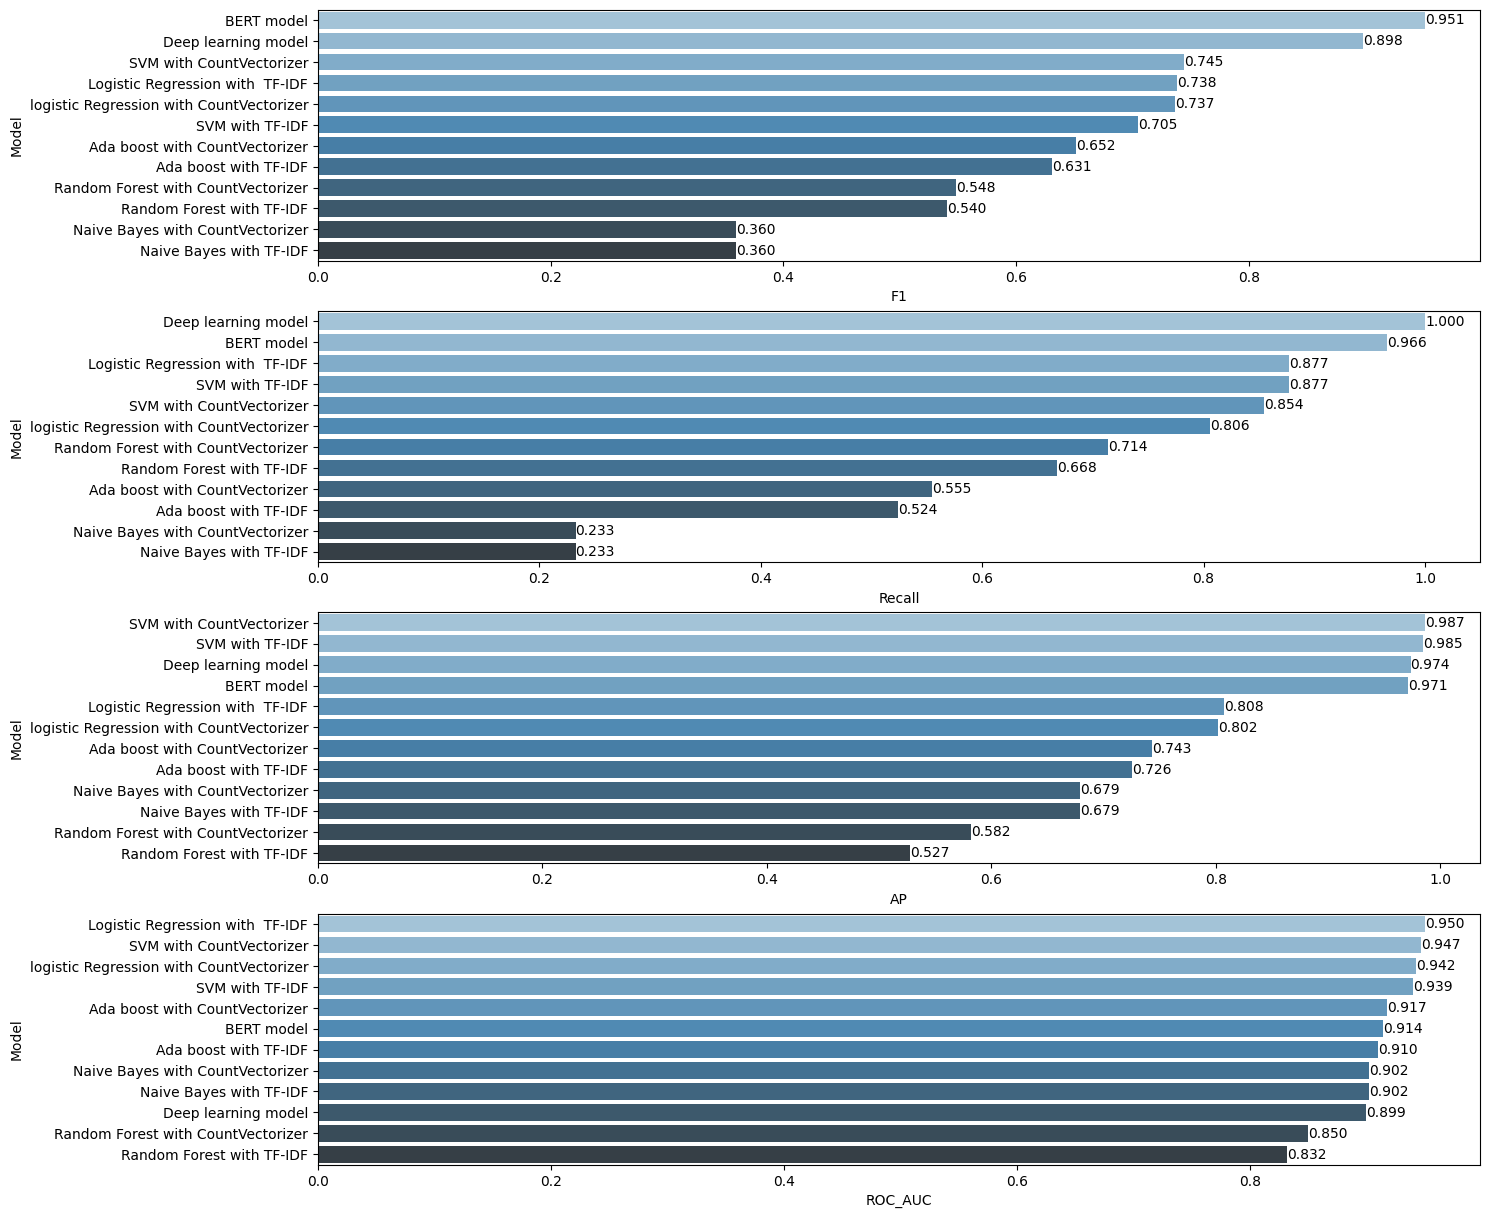

In [ ]:
def labels(ax):   # Sayilari yazdirmak icin.
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment

plt.figure(figsize=(15,15))
plt.subplot(411)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")        # f1 score
labels(ax)

plt.subplot(412)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")   # recall score
labels(ax)

plt.subplot(413)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")       # average precision score
labels(ax)

plt.subplot(414)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")       # average auc score
labels(ax)
plt.show()

## Conclusion

In this project, sentiment analysis was employed to assess product recommendations. A variety of machine learning (ML) algorithms were utilized to enhance prediction accuracy, and a deep learning (DL) algorithm was incorporated for comparative analysis with traditional machine learning models.

Upon comparing the models, it is evident that the DL and BERT algorithm outperformed the ML algorithms, exhibiting higher F1-score, recall, and AP values.

# ___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___